In [1]:
import pandas as pd
dataset= pd.read_csv(r"C:\Users\rafi\Desktop\master pro\EB7_by_LA2.csv", encoding= 'unicode_escape', delimiter= ',')
print(dataset)

      AverageFloorArea  Year/Quarter  Property Type  \
0                 14.0             1              5   
1                 14.0             4              1   
2                 19.0             1              4   
3                 20.0             1              1   
4                 20.0             1              2   
...                ...           ...            ...   
1413             145.0             1              3   
1414             145.0             4              3   
1415             146.0             4              1   
1416             147.0             2              3   
1417             147.0             4              3   

      EnergyUseAveragePerDwelling  CarbonDioxideEmissionsAveragePerDwelling  \
0                           356.0                                       1.0   
1                           468.0                                       1.0   
2                           375.0                                       1.0   
3                      

In [2]:
dataset.dtypes

AverageFloorArea                            float64
Year/Quarter                                  int64
Property Type                                 int64
EnergyUseAveragePerDwelling                 float64
CarbonDioxideEmissionsAveragePerDwelling    float64
LightingCostAveragePerDwelling              float64
HeatingCostAveragePerDwelling               float64
HotWaterCostAveragePerDwelling              float64
dtype: object

In [3]:
del dataset['HeatingCostAveragePerDwelling']
del dataset['HotWaterCostAveragePerDwelling']
del dataset['CarbonDioxideEmissionsAveragePerDwelling']

In [4]:
dataset

,AverageFloorArea,Year/Quarter,Property Type,EnergyUseAveragePerDwelling,LightingCostAveragePerDwelling
0,14.0,1,5,356.0,22.0
1,14.0,4,1,468.0,39.0
2,19.0,1,4,375.0,22.0
3,20.0,1,1,447.0,24.0
4,20.0,1,2,366.0,32.0
...,...,...,...,...,...
1413,145.0,1,3,241.0,112.0
1414,145.0,4,3,227.0,108.0
1415,146.0,4,1,234.0,94.0
1416,147.0,2,3,233.0,116.0


In [5]:
dataset['EnergyUseAveragePerDwelling'] = dataset['EnergyUseAveragePerDwelling'].astype(int)
dataset['AverageFloorArea'] = dataset['AverageFloorArea'].astype(int)
dataset['LightingCostAveragePerDwelling'] = dataset['LightingCostAveragePerDwelling'].astype(int)
dataset

,AverageFloorArea,Year/Quarter,Property Type,EnergyUseAveragePerDwelling,LightingCostAveragePerDwelling
0,14,1,5,356,22
1,14,4,1,468,39
2,19,1,4,375,22
3,20,1,1,447,24
4,20,1,2,366,32
...,...,...,...,...,...
1413,145,1,3,241,112
1414,145,4,3,227,108
1415,146,4,1,234,94
1416,147,2,3,233,116


In [6]:
from sklearn.model_selection import train_test_split
X=dataset.drop('LightingCostAveragePerDwelling',axis=1)
Y=dataset['LightingCostAveragePerDwelling']
X_train, X_test, Y_train, Y_test =train_test_split(X,Y, test_size=0.3, random_state = 0)
X_train

,AverageFloorArea,Year/Quarter,Property Type,EnergyUseAveragePerDwelling
565,67,3,1,309
828,83,3,1,302
759,79,3,2,266
1385,134,4,4,271
165,42,4,2,302
...,...,...,...,...
763,79,4,1,315
835,83,4,5,219
1216,113,3,1,260
559,67,1,4,296


## Naive bias

In [11]:
from sklearn.naive_bayes import GaussianNB
NB_model=GaussianNB()
NB_model.fit(X_train.values,Y_train.values)

GaussianNB()

In [12]:
prediction = NB_model.predict([[80,2,2,129]])
print("Prediction: {}".format(prediction))

Prediction: [77]


In [13]:
from sklearn.metrics import r2_score
r2_score(Y_test, NB_model.predict(X_test.values))

0.8128362281441134

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, NB_model.predict(X_test.values))
mae= mean_absolute_error(Y_test, NB_model.predict(X_test.values))
print('mean squired error:', mse)
print('mean absolute error:', mae)

mean squired error: 80.78403755868544
mean absolute error: 6.028169014084507


Text(0.5, 1.0, 'Actual vs predicted')

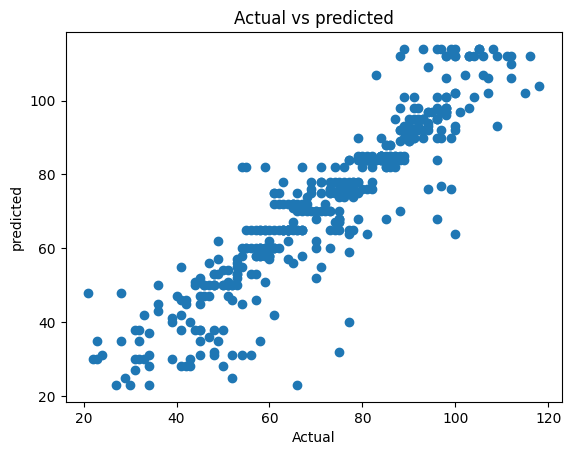

In [15]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, NB_model.predict(X_test.values))
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [16]:
y_prd=NB_model.predict(X_test.values)
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

,Actual,predict,differences
431,54,60,-6
610,64,72,-8
795,77,76,1
1238,96,95,1
1228,97,97,0
794,80,76,4
642,67,72,-5
416,57,60,-3
1410,118,104,14
517,63,65,-2


## Linear regression

In [17]:
from sklearn import linear_model
lr_model=linear_model.LinearRegression()
lr_model.fit(X_train.values,Y_train.values)

LinearRegression()

In [18]:
prediction = lr_model.predict([[80,2,2,129]])
print("Prediction: {}".format(prediction))

Prediction: [70.4738148]


In [19]:
from sklearn.metrics import r2_score
r2_score(Y_test, lr_model.predict(X_test.values))

0.8675792129971217

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, lr_model.predict(X_test.values))
mae= mean_absolute_error(Y_test, lr_model.predict(X_test.values))
print('mean squired error:', mse)
print('mean absolute error:', mae)

mean squired error: 57.15575041428485
mean absolute error: 4.879575655460369


Text(0.5, 1.0, 'Actual vs predicted')

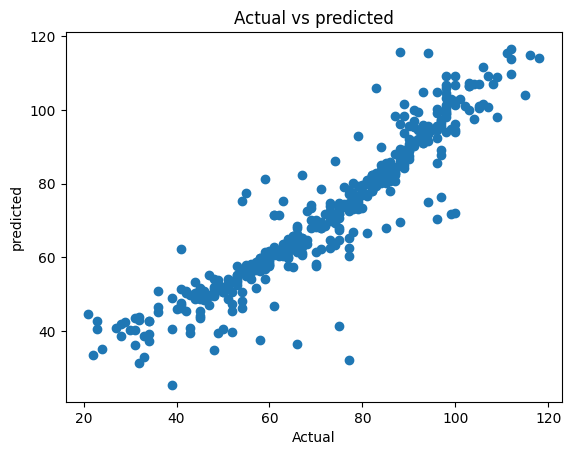

In [21]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, lr_model.predict(X_test.values))
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [22]:
y_prd=lr_model.predict(X_test.values)
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

,Actual,predict,differences
431,54,56.209684,-2.209684
610,64,63.875705,0.124295
795,77,74.898620,2.101380
1238,96,94.561938,1.438062
1228,97,96.588167,0.411833
794,80,73.510297,6.489703
642,67,65.226905,1.773095
416,57,56.687981,0.312019
1410,118,114.087292,3.912708
517,63,60.392380,2.607620


## Random forest

In [7]:
from sklearn.ensemble import RandomForestRegressor
RF= RandomForestRegressor(n_estimators=200,random_state=30)
RF.fit(X_train.values,Y_train.values)
prediction = RF.predict([[80,2,2,129]])
print("Prediction: {}".format(prediction))

Prediction: [72.335]


In [41]:
from sklearn.metrics import r2_score
r2_score(Y_test, RF.predict(X_test.values))

0.8826698627555499

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, RF.predict(X_test.values))
mae= mean_absolute_error(Y_test, RF.predict(X_test.values))
print('mean squired error:', mse)
print('mean absolute error:', mae)

mean squired error: 50.64229107981221
mean absolute error: 4.151431924882629


Text(0.5, 1.0, 'Actual vs predicted')

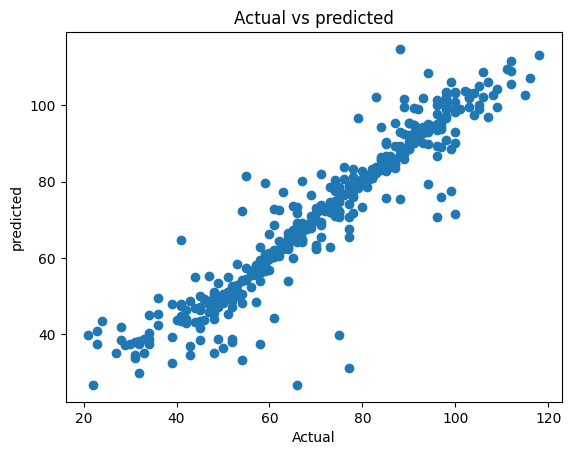

In [43]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, RF.predict(X_test.values))
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [44]:
y_prd=RF.predict(X_test.values)
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

,Actual,predict,differences
431,54,54.215,-0.215
610,64,65.600,-1.600
795,77,79.035,-2.035
1238,96,95.205,0.795
1228,97,93.915,3.085
794,80,73.285,6.715
642,67,67.590,-0.590
416,57,58.185,-1.185
1410,118,113.240,4.760
517,63,63.370,-0.370


## KNN

In [45]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=30)
knn.fit(X_train.values,Y_train.values)
prediction = knn.predict([[80,2,2,129]])
print("Prediction: {}".format(prediction))

Prediction: [78.36666667]


In [46]:
from sklearn.metrics import r2_score
r2_score(Y_test, knn.predict(X_test.values))

0.8583519296010016

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, knn.predict(X_test.values))
mae= mean_absolute_error(Y_test, knn.predict(X_test.values))
print('mean squired error:', mse)
print('mean absolute error:', mae)

mean squired error: 61.13845070422536
mean absolute error: 4.8195618153364626


Text(0.5, 1.0, 'Actual vs predicted')

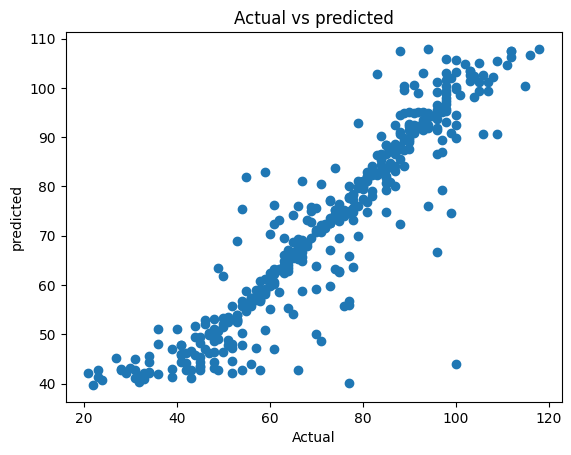

In [48]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, knn.predict(X_test.values))
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [49]:
y_prd=knn.predict(X_test.values)
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

,Actual,predict,differences
431,54,56.800000,-2.800000
610,64,66.400000,-2.400000
795,77,77.800000,-0.800000
1238,96,95.600000,0.400000
1228,97,95.466667,1.533333
794,80,77.366667,2.633333
642,67,67.533333,-0.533333
416,57,57.100000,-0.100000
1410,118,107.866667,10.133333
517,63,64.800000,-1.800000


## CNN

In [50]:
from keras.layers import Dense, Dropout,Activation, Conv1D,MaxPooling1D,Flatten
from keras.models import Sequential
model1=Sequential()
model1.add(Conv1D(64, kernel_size=1, activation='relu', name='Conv1D_1',input_shape=(X_train.shape[1],1)))
model1.add(Dropout(0.2))
model1.add(Conv1D(32, kernel_size=1, activation='relu', name='Conv1D_2'))
model1.add(Conv1D(16, kernel_size=1, activation='relu', name='Conv1D_3'))
model1.add(MaxPooling1D(pool_size=1,name="maxpooling_2"))
model1.add(Flatten())
model1.add(Dense(32, activation='linear',name='Dense_1'))
model1.add(Dense(units=1))
model1.compile(loss='mean_squared_error',optimizer='adam', metrics=['mae'])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1D_1 (Conv1D)           (None, 4, 64)             128       
                                                                 
 dropout (Dropout)           (None, 4, 64)             0         
                                                                 
 Conv1D_2 (Conv1D)           (None, 4, 32)             2080      
                                                                 
 Conv1D_3 (Conv1D)           (None, 4, 16)             528       
                                                                 
 maxpooling_2 (MaxPooling1D)  (None, 4, 16)            0         
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 Dense_1 (Dense)             (None, 32)                2

In [51]:
model1.fit(X_train,Y_train ,epochs =2000,batch_size=32,validation_split=0.3)

Epoch 1/2000
22/22 [==============================] - 6s 65ms/step - loss: 2157.3555 - mae: 38.4759 - val_loss: 583.1921 - val_mae: 19.6335
Epoch 2/2000
22/22 [==============================] - 0s 14ms/step - loss: 726.0052 - mae: 22.1166 - val_loss: 493.0026 - val_mae: 18.6942
Epoch 3/2000
22/22 [==============================] - 0s 14ms/step - loss: 424.7799 - mae: 16.5301 - val_loss: 322.7291 - val_mae: 15.2194
Epoch 4/2000
22/22 [==============================] - 0s 16ms/step - loss: 284.4213 - mae: 13.3267 - val_loss: 118.3108 - val_mae: 9.2622
Epoch 5/2000
22/22 [==============================] - 0s 15ms/step - loss: 165.1206 - mae: 9.9556 - val_loss: 54.3571 - val_mae: 5.7833
Epoch 6/2000
22/22 [==============================] - 0s 16ms/step - loss: 135.4225 - mae: 9.0014 - val_loss: 60.3622 - val_mae: 6.2382
Epoch 7/2000
22/22 [==============================] - 0s 12ms/step - loss: 114.5671 - mae: 8.3356 - val_loss: 65.6224 - val_mae: 6.6516
Epoch 8/2000
22/22 [================

Epoch 61/2000
22/22 [==============================] - 0s 11ms/step - loss: 56.4908 - mae: 5.6216 - val_loss: 162.9654 - val_mae: 11.3849
Epoch 62/2000
22/22 [==============================] - 0s 15ms/step - loss: 49.9846 - mae: 5.2719 - val_loss: 127.1174 - val_mae: 9.9614
Epoch 63/2000
22/22 [==============================] - 0s 15ms/step - loss: 47.8682 - mae: 5.2071 - val_loss: 118.3506 - val_mae: 9.5387
Epoch 64/2000
22/22 [==============================] - 0s 16ms/step - loss: 53.9222 - mae: 5.4475 - val_loss: 112.2153 - val_mae: 9.2588
Epoch 65/2000
22/22 [==============================] - 0s 14ms/step - loss: 48.6087 - mae: 5.2053 - val_loss: 154.3557 - val_mae: 11.0485
Epoch 66/2000
22/22 [==============================] - 0s 15ms/step - loss: 54.3420 - mae: 5.4629 - val_loss: 167.3287 - val_mae: 11.6079
Epoch 67/2000
22/22 [==============================] - 0s 15ms/step - loss: 53.9746 - mae: 5.5291 - val_loss: 164.2013 - val_mae: 11.4023
Epoch 68/2000
22/22 [================

22/22 [==============================] - 0s 13ms/step - loss: 43.3405 - mae: 4.8282 - val_loss: 236.6536 - val_mae: 13.8765
Epoch 180/2000
22/22 [==============================] - 0s 14ms/step - loss: 47.0423 - mae: 5.1877 - val_loss: 175.6150 - val_mae: 11.7201
Epoch 181/2000
22/22 [==============================] - 0s 9ms/step - loss: 41.8516 - mae: 4.7175 - val_loss: 138.3282 - val_mae: 10.2993
Epoch 182/2000
22/22 [==============================] - 0s 15ms/step - loss: 44.6819 - mae: 4.9333 - val_loss: 163.2661 - val_mae: 11.2645
Epoch 183/2000
22/22 [==============================] - 0s 11ms/step - loss: 42.9879 - mae: 4.8237 - val_loss: 185.9490 - val_mae: 12.2559
Epoch 184/2000
22/22 [==============================] - 0s 15ms/step - loss: 42.7574 - mae: 4.8120 - val_loss: 163.5274 - val_mae: 11.2916
Epoch 185/2000
22/22 [==============================] - 0s 10ms/step - loss: 42.3503 - mae: 4.7840 - val_loss: 172.1010 - val_mae: 11.6246
Epoch 186/2000
22/22 [=====================

22/22 [==============================] - 0s 11ms/step - loss: 41.5332 - mae: 4.6084 - val_loss: 211.3765 - val_mae: 13.0272
Epoch 239/2000
22/22 [==============================] - 0s 15ms/step - loss: 39.2650 - mae: 4.4521 - val_loss: 196.2876 - val_mae: 12.5196
Epoch 240/2000
22/22 [==============================] - 0s 8ms/step - loss: 45.0650 - mae: 4.9546 - val_loss: 267.2180 - val_mae: 14.8884
Epoch 241/2000
22/22 [==============================] - 0s 13ms/step - loss: 46.2034 - mae: 4.9019 - val_loss: 195.7857 - val_mae: 12.4618
Epoch 242/2000
22/22 [==============================] - 0s 13ms/step - loss: 42.1997 - mae: 4.7979 - val_loss: 162.0396 - val_mae: 11.2512
Epoch 243/2000
22/22 [==============================] - 0s 13ms/step - loss: 39.4929 - mae: 4.5171 - val_loss: 205.4159 - val_mae: 12.8380
Epoch 244/2000
22/22 [==============================] - 0s 11ms/step - loss: 41.4235 - mae: 4.6364 - val_loss: 205.7208 - val_mae: 12.8966
Epoch 245/2000
22/22 [=====================

22/22 [==============================] - 0s 14ms/step - loss: 40.1675 - mae: 4.6184 - val_loss: 188.9559 - val_mae: 12.2541
Epoch 298/2000
22/22 [==============================] - 0s 13ms/step - loss: 38.6713 - mae: 4.4516 - val_loss: 221.1882 - val_mae: 13.3934
Epoch 299/2000
22/22 [==============================] - 0s 13ms/step - loss: 40.6236 - mae: 4.5863 - val_loss: 172.6522 - val_mae: 11.7044
Epoch 300/2000
22/22 [==============================] - 0s 10ms/step - loss: 40.8585 - mae: 4.6348 - val_loss: 181.7793 - val_mae: 11.9559
Epoch 301/2000
22/22 [==============================] - 0s 12ms/step - loss: 40.6108 - mae: 4.6401 - val_loss: 151.3995 - val_mae: 10.8616
Epoch 302/2000
22/22 [==============================] - 0s 11ms/step - loss: 42.3089 - mae: 4.7485 - val_loss: 209.8557 - val_mae: 12.9774
Epoch 303/2000
22/22 [==============================] - 0s 16ms/step - loss: 38.8537 - mae: 4.4148 - val_loss: 151.9612 - val_mae: 10.8601
Epoch 304/2000
22/22 [====================

22/22 [==============================] - 0s 16ms/step - loss: 40.0719 - mae: 4.5670 - val_loss: 235.5641 - val_mae: 13.8321
Epoch 357/2000
22/22 [==============================] - 0s 10ms/step - loss: 38.4514 - mae: 4.4098 - val_loss: 215.0331 - val_mae: 13.1671
Epoch 358/2000
22/22 [==============================] - 0s 14ms/step - loss: 40.1819 - mae: 4.5402 - val_loss: 217.6532 - val_mae: 13.2311
Epoch 359/2000
22/22 [==============================] - 0s 9ms/step - loss: 37.2844 - mae: 4.3458 - val_loss: 165.2849 - val_mae: 11.3674
Epoch 360/2000
22/22 [==============================] - 0s 15ms/step - loss: 42.5582 - mae: 4.6798 - val_loss: 186.0228 - val_mae: 12.1276
Epoch 361/2000
22/22 [==============================] - 0s 9ms/step - loss: 39.0956 - mae: 4.4467 - val_loss: 220.3224 - val_mae: 13.3976
Epoch 362/2000
22/22 [==============================] - 0s 12ms/step - loss: 40.1983 - mae: 4.5387 - val_loss: 226.2020 - val_mae: 13.5469
Epoch 363/2000
22/22 [======================

22/22 [==============================] - 0s 14ms/step - loss: 41.6182 - mae: 4.6403 - val_loss: 168.8892 - val_mae: 11.4778
Epoch 416/2000
22/22 [==============================] - 0s 12ms/step - loss: 42.5709 - mae: 4.7761 - val_loss: 197.6057 - val_mae: 12.5712
Epoch 417/2000
22/22 [==============================] - 0s 11ms/step - loss: 37.8683 - mae: 4.4214 - val_loss: 223.1735 - val_mae: 13.4475
Epoch 418/2000
22/22 [==============================] - 0s 10ms/step - loss: 39.8836 - mae: 4.5526 - val_loss: 200.5402 - val_mae: 12.6557
Epoch 419/2000
22/22 [==============================] - 0s 12ms/step - loss: 38.4312 - mae: 4.4065 - val_loss: 205.2252 - val_mae: 12.8896
Epoch 420/2000
22/22 [==============================] - 0s 11ms/step - loss: 38.7880 - mae: 4.4776 - val_loss: 161.2772 - val_mae: 11.2238
Epoch 421/2000
22/22 [==============================] - 0s 13ms/step - loss: 38.9855 - mae: 4.4909 - val_loss: 199.6635 - val_mae: 12.6339
Epoch 422/2000
22/22 [====================

22/22 [==============================] - 0s 10ms/step - loss: 39.2196 - mae: 4.5278 - val_loss: 199.0688 - val_mae: 12.6414
Epoch 475/2000
22/22 [==============================] - 0s 10ms/step - loss: 36.7906 - mae: 4.2670 - val_loss: 207.4380 - val_mae: 12.9477
Epoch 476/2000
22/22 [==============================] - 0s 15ms/step - loss: 37.7716 - mae: 4.3566 - val_loss: 198.0912 - val_mae: 12.5990
Epoch 477/2000
22/22 [==============================] - 0s 17ms/step - loss: 38.1169 - mae: 4.4048 - val_loss: 267.6244 - val_mae: 14.8737
Epoch 478/2000
22/22 [==============================] - 0s 10ms/step - loss: 38.9830 - mae: 4.5026 - val_loss: 201.2922 - val_mae: 12.7129
Epoch 479/2000
22/22 [==============================] - 0s 12ms/step - loss: 37.2482 - mae: 4.3453 - val_loss: 204.9358 - val_mae: 12.8267
Epoch 480/2000
22/22 [==============================] - 0s 11ms/step - loss: 38.5429 - mae: 4.4660 - val_loss: 222.6587 - val_mae: 13.4495
Epoch 481/2000
22/22 [====================

22/22 [==============================] - 0s 15ms/step - loss: 38.4597 - mae: 4.4321 - val_loss: 174.1804 - val_mae: 11.7134
Epoch 534/2000
22/22 [==============================] - 0s 13ms/step - loss: 38.1475 - mae: 4.4135 - val_loss: 168.7083 - val_mae: 11.5068
Epoch 535/2000
22/22 [==============================] - 0s 12ms/step - loss: 39.2241 - mae: 4.4811 - val_loss: 178.1822 - val_mae: 11.8381
Epoch 536/2000
22/22 [==============================] - 0s 14ms/step - loss: 39.3635 - mae: 4.5708 - val_loss: 240.9800 - val_mae: 14.0448
Epoch 537/2000
22/22 [==============================] - 0s 10ms/step - loss: 37.3755 - mae: 4.4166 - val_loss: 168.2728 - val_mae: 11.4745
Epoch 538/2000
22/22 [==============================] - 0s 15ms/step - loss: 37.8391 - mae: 4.3794 - val_loss: 207.5524 - val_mae: 12.9125
Epoch 539/2000
22/22 [==============================] - 0s 15ms/step - loss: 37.9344 - mae: 4.3284 - val_loss: 247.2395 - val_mae: 14.2549
Epoch 540/2000
22/22 [====================

22/22 [==============================] - 0s 17ms/step - loss: 37.6047 - mae: 4.2982 - val_loss: 172.9055 - val_mae: 11.6312
Epoch 593/2000
22/22 [==============================] - 0s 13ms/step - loss: 37.8506 - mae: 4.2856 - val_loss: 237.0259 - val_mae: 13.9281
Epoch 594/2000
22/22 [==============================] - 0s 12ms/step - loss: 37.4354 - mae: 4.3037 - val_loss: 214.8685 - val_mae: 13.2023
Epoch 595/2000
22/22 [==============================] - 0s 9ms/step - loss: 36.6664 - mae: 4.2125 - val_loss: 197.9971 - val_mae: 12.5561
Epoch 596/2000
22/22 [==============================] - 0s 13ms/step - loss: 37.5862 - mae: 4.3624 - val_loss: 178.5148 - val_mae: 11.9065
Epoch 597/2000
22/22 [==============================] - 0s 10ms/step - loss: 39.6239 - mae: 4.4595 - val_loss: 173.0980 - val_mae: 11.6582
Epoch 598/2000
22/22 [==============================] - 0s 15ms/step - loss: 38.6504 - mae: 4.4074 - val_loss: 185.7906 - val_mae: 12.1048
Epoch 599/2000
22/22 [=====================

22/22 [==============================] - 0s 13ms/step - loss: 38.8680 - mae: 4.4017 - val_loss: 172.2280 - val_mae: 11.6351
Epoch 711/2000
22/22 [==============================] - 0s 11ms/step - loss: 37.8492 - mae: 4.2647 - val_loss: 186.1431 - val_mae: 12.1663
Epoch 712/2000
22/22 [==============================] - 0s 13ms/step - loss: 37.9492 - mae: 4.3688 - val_loss: 233.7208 - val_mae: 13.8026
Epoch 713/2000
22/22 [==============================] - 0s 8ms/step - loss: 38.0880 - mae: 4.4859 - val_loss: 163.6739 - val_mae: 11.3240
Epoch 714/2000
22/22 [==============================] - 0s 12ms/step - loss: 37.9595 - mae: 4.4214 - val_loss: 209.3747 - val_mae: 12.9811
Epoch 715/2000
22/22 [==============================] - 0s 11ms/step - loss: 38.6582 - mae: 4.4819 - val_loss: 136.9831 - val_mae: 10.2776
Epoch 716/2000
22/22 [==============================] - 0s 8ms/step - loss: 39.6793 - mae: 4.5022 - val_loss: 182.3179 - val_mae: 12.0093
Epoch 717/2000
22/22 [======================

22/22 [==============================] - 0s 11ms/step - loss: 36.5008 - mae: 4.2794 - val_loss: 182.4500 - val_mae: 12.0270
Epoch 770/2000
22/22 [==============================] - 0s 13ms/step - loss: 36.8284 - mae: 4.2450 - val_loss: 197.5449 - val_mae: 12.5324
Epoch 771/2000
22/22 [==============================] - 0s 13ms/step - loss: 36.8963 - mae: 4.2412 - val_loss: 201.5406 - val_mae: 12.7557
Epoch 772/2000
22/22 [==============================] - 0s 11ms/step - loss: 37.2285 - mae: 4.3246 - val_loss: 210.6638 - val_mae: 13.0469
Epoch 773/2000
22/22 [==============================] - 0s 14ms/step - loss: 36.5859 - mae: 4.2067 - val_loss: 211.4756 - val_mae: 13.0616
Epoch 774/2000
22/22 [==============================] - 0s 11ms/step - loss: 38.1954 - mae: 4.3717 - val_loss: 192.9955 - val_mae: 12.4194
Epoch 775/2000
22/22 [==============================] - 0s 17ms/step - loss: 36.1628 - mae: 4.2330 - val_loss: 199.6604 - val_mae: 12.6576
Epoch 776/2000
22/22 [====================

22/22 [==============================] - 0s 13ms/step - loss: 36.9880 - mae: 4.2565 - val_loss: 216.5956 - val_mae: 13.2370
Epoch 888/2000
22/22 [==============================] - 0s 11ms/step - loss: 36.9907 - mae: 4.2495 - val_loss: 214.0711 - val_mae: 13.1925
Epoch 889/2000
22/22 [==============================] - 0s 12ms/step - loss: 37.6945 - mae: 4.3003 - val_loss: 175.9400 - val_mae: 11.7932
Epoch 890/2000
22/22 [==============================] - 0s 10ms/step - loss: 37.4007 - mae: 4.2777 - val_loss: 232.2950 - val_mae: 13.8007
Epoch 891/2000
22/22 [==============================] - 0s 15ms/step - loss: 36.4050 - mae: 4.2269 - val_loss: 213.4574 - val_mae: 13.1093
Epoch 892/2000
22/22 [==============================] - 0s 9ms/step - loss: 36.4944 - mae: 4.1907 - val_loss: 205.6087 - val_mae: 12.9070
Epoch 893/2000
22/22 [==============================] - 0s 12ms/step - loss: 36.0809 - mae: 4.2314 - val_loss: 193.8224 - val_mae: 12.4195
Epoch 894/2000
22/22 [=====================

22/22 [==============================] - 0s 15ms/step - loss: 37.9229 - mae: 4.4348 - val_loss: 256.9277 - val_mae: 14.5758
Epoch 947/2000
22/22 [==============================] - 0s 18ms/step - loss: 37.1407 - mae: 4.3266 - val_loss: 216.3271 - val_mae: 13.2522
Epoch 948/2000
22/22 [==============================] - 0s 16ms/step - loss: 37.8900 - mae: 4.3425 - val_loss: 190.9478 - val_mae: 12.3500
Epoch 949/2000
22/22 [==============================] - 0s 22ms/step - loss: 37.1885 - mae: 4.3543 - val_loss: 218.8855 - val_mae: 13.3525
Epoch 950/2000
22/22 [==============================] - 0s 18ms/step - loss: 36.6404 - mae: 4.3155 - val_loss: 152.2184 - val_mae: 10.8862
Epoch 951/2000
22/22 [==============================] - 0s 18ms/step - loss: 37.6338 - mae: 4.3520 - val_loss: 269.6400 - val_mae: 15.0053
Epoch 952/2000
22/22 [==============================] - 0s 20ms/step - loss: 37.2230 - mae: 4.2966 - val_loss: 182.4220 - val_mae: 12.0261
Epoch 953/2000
22/22 [====================

22/22 [==============================] - 0s 21ms/step - loss: 37.1983 - mae: 4.2885 - val_loss: 193.5791 - val_mae: 12.4964
Epoch 1006/2000
22/22 [==============================] - 0s 13ms/step - loss: 37.4450 - mae: 4.2873 - val_loss: 232.4257 - val_mae: 13.7432
Epoch 1007/2000
22/22 [==============================] - 0s 17ms/step - loss: 36.7505 - mae: 4.3368 - val_loss: 232.7505 - val_mae: 13.8240
Epoch 1008/2000
22/22 [==============================] - 0s 15ms/step - loss: 40.1452 - mae: 4.5289 - val_loss: 272.0667 - val_mae: 15.0387
Epoch 1009/2000
22/22 [==============================] - 0s 21ms/step - loss: 38.4146 - mae: 4.4226 - val_loss: 188.0855 - val_mae: 12.2577
Epoch 1010/2000
22/22 [==============================] - 0s 20ms/step - loss: 35.7019 - mae: 4.2018 - val_loss: 181.8621 - val_mae: 12.0143
Epoch 1011/2000
22/22 [==============================] - 0s 14ms/step - loss: 36.3297 - mae: 4.3087 - val_loss: 232.6349 - val_mae: 13.8049
Epoch 1012/2000
22/22 [=============

22/22 [==============================] - 0s 16ms/step - loss: 36.4284 - mae: 4.3117 - val_loss: 211.3925 - val_mae: 13.0523
Epoch 1122/2000
22/22 [==============================] - 0s 16ms/step - loss: 36.2228 - mae: 4.2358 - val_loss: 211.8400 - val_mae: 13.1260
Epoch 1123/2000
22/22 [==============================] - 0s 21ms/step - loss: 35.7782 - mae: 4.1639 - val_loss: 180.5236 - val_mae: 11.9557
Epoch 1124/2000
22/22 [==============================] - 0s 11ms/step - loss: 36.6230 - mae: 4.2242 - val_loss: 256.4160 - val_mae: 14.5638
Epoch 1125/2000
22/22 [==============================] - 0s 19ms/step - loss: 37.9883 - mae: 4.3767 - val_loss: 186.9133 - val_mae: 12.1768
Epoch 1126/2000
22/22 [==============================] - 0s 16ms/step - loss: 37.5119 - mae: 4.3336 - val_loss: 217.3517 - val_mae: 13.3071
Epoch 1127/2000
22/22 [==============================] - 0s 18ms/step - loss: 38.0018 - mae: 4.3660 - val_loss: 239.4588 - val_mae: 14.0048
Epoch 1128/2000
22/22 [=============

22/22 [==============================] - 0s 19ms/step - loss: 34.4427 - mae: 4.0426 - val_loss: 216.9532 - val_mae: 13.5341
Epoch 1238/2000
22/22 [==============================] - 0s 14ms/step - loss: 35.1443 - mae: 4.1087 - val_loss: 233.8128 - val_mae: 14.0822
Epoch 1239/2000
22/22 [==============================] - 0s 23ms/step - loss: 35.6323 - mae: 4.1856 - val_loss: 189.9742 - val_mae: 12.5144
Epoch 1240/2000
22/22 [==============================] - 0s 16ms/step - loss: 33.8083 - mae: 3.9638 - val_loss: 237.5147 - val_mae: 14.2253
Epoch 1241/2000
22/22 [==============================] - 0s 18ms/step - loss: 33.3759 - mae: 3.9193 - val_loss: 227.2063 - val_mae: 13.7547
Epoch 1242/2000
22/22 [==============================] - 0s 21ms/step - loss: 35.4400 - mae: 4.1156 - val_loss: 221.7655 - val_mae: 13.6194
Epoch 1243/2000
22/22 [==============================] - 0s 14ms/step - loss: 34.6237 - mae: 4.0463 - val_loss: 245.7289 - val_mae: 14.4930
Epoch 1244/2000
22/22 [=============

22/22 [==============================] - 1s 27ms/step - loss: 34.1053 - mae: 4.0683 - val_loss: 206.6193 - val_mae: 13.2405
Epoch 1354/2000
22/22 [==============================] - 0s 20ms/step - loss: 31.4572 - mae: 3.6875 - val_loss: 192.5036 - val_mae: 12.6827
Epoch 1355/2000
22/22 [==============================] - 0s 16ms/step - loss: 33.8254 - mae: 3.9586 - val_loss: 167.2511 - val_mae: 11.7996
Epoch 1356/2000
22/22 [==============================] - 0s 21ms/step - loss: 33.9434 - mae: 3.9917 - val_loss: 236.1352 - val_mae: 14.1911
Epoch 1357/2000
22/22 [==============================] - 0s 13ms/step - loss: 32.3726 - mae: 3.7996 - val_loss: 216.1568 - val_mae: 13.6024
Epoch 1358/2000
22/22 [==============================] - 0s 22ms/step - loss: 31.1294 - mae: 3.6817 - val_loss: 251.5657 - val_mae: 14.8046
Epoch 1359/2000
22/22 [==============================] - 0s 15ms/step - loss: 33.0128 - mae: 3.9867 - val_loss: 190.3968 - val_mae: 12.6256
Epoch 1360/2000
22/22 [=============

22/22 [==============================] - 0s 14ms/step - loss: 32.3391 - mae: 3.7664 - val_loss: 230.0683 - val_mae: 14.1400
Epoch 1470/2000
22/22 [==============================] - 0s 21ms/step - loss: 32.0811 - mae: 3.8098 - val_loss: 215.5225 - val_mae: 13.6156
Epoch 1471/2000
22/22 [==============================] - 0s 21ms/step - loss: 32.3527 - mae: 3.8573 - val_loss: 189.6064 - val_mae: 12.5974
Epoch 1472/2000
22/22 [==============================] - 0s 13ms/step - loss: 32.1927 - mae: 3.7121 - val_loss: 183.9408 - val_mae: 12.3863
Epoch 1473/2000
22/22 [==============================] - 0s 22ms/step - loss: 32.6270 - mae: 3.8608 - val_loss: 209.4706 - val_mae: 13.4319
Epoch 1474/2000
22/22 [==============================] - 0s 16ms/step - loss: 30.5595 - mae: 3.5986 - val_loss: 215.8557 - val_mae: 13.5711
Epoch 1475/2000
22/22 [==============================] - 0s 15ms/step - loss: 31.3416 - mae: 3.6501 - val_loss: 218.8702 - val_mae: 13.7086
Epoch 1476/2000
22/22 [=============

22/22 [==============================] - 0s 13ms/step - loss: 33.6418 - mae: 3.9346 - val_loss: 221.3866 - val_mae: 13.8091
Epoch 1586/2000
22/22 [==============================] - 0s 15ms/step - loss: 31.7995 - mae: 3.7799 - val_loss: 184.9059 - val_mae: 12.3952
Epoch 1587/2000
22/22 [==============================] - 0s 21ms/step - loss: 31.4188 - mae: 3.7557 - val_loss: 198.5677 - val_mae: 13.0288
Epoch 1588/2000
22/22 [==============================] - 0s 18ms/step - loss: 31.0177 - mae: 3.6428 - val_loss: 237.1025 - val_mae: 14.3330
Epoch 1589/2000
22/22 [==============================] - 0s 12ms/step - loss: 30.9680 - mae: 3.6649 - val_loss: 211.1218 - val_mae: 13.4283
Epoch 1590/2000
22/22 [==============================] - 0s 24ms/step - loss: 30.8650 - mae: 3.6239 - val_loss: 217.5993 - val_mae: 13.6371
Epoch 1591/2000
22/22 [==============================] - 0s 22ms/step - loss: 31.3723 - mae: 3.7412 - val_loss: 201.2938 - val_mae: 13.0853
Epoch 1592/2000
22/22 [=============

22/22 [==============================] - 0s 15ms/step - loss: 32.5719 - mae: 3.8482 - val_loss: 156.1166 - val_mae: 11.1995
Epoch 1702/2000
22/22 [==============================] - 0s 9ms/step - loss: 32.9791 - mae: 4.0111 - val_loss: 271.7946 - val_mae: 15.4795
Epoch 1703/2000
22/22 [==============================] - 0s 17ms/step - loss: 31.9277 - mae: 3.8279 - val_loss: 193.1460 - val_mae: 12.7876
Epoch 1704/2000
22/22 [==============================] - 0s 11ms/step - loss: 30.6545 - mae: 3.5849 - val_loss: 206.0988 - val_mae: 13.2556
Epoch 1705/2000
22/22 [==============================] - 0s 21ms/step - loss: 31.4368 - mae: 3.6261 - val_loss: 185.4762 - val_mae: 12.4710
Epoch 1706/2000
22/22 [==============================] - 0s 13ms/step - loss: 30.5048 - mae: 3.6211 - val_loss: 200.6946 - val_mae: 12.9856
Epoch 1707/2000
22/22 [==============================] - 0s 20ms/step - loss: 30.3151 - mae: 3.6125 - val_loss: 210.8534 - val_mae: 13.4752
Epoch 1708/2000
22/22 [==============

22/22 [==============================] - 1s 26ms/step - loss: 31.5144 - mae: 3.7250 - val_loss: 173.3905 - val_mae: 12.0043
Epoch 1818/2000
22/22 [==============================] - 0s 18ms/step - loss: 31.9619 - mae: 3.7629 - val_loss: 210.7858 - val_mae: 13.4606
Epoch 1819/2000
22/22 [==============================] - 0s 17ms/step - loss: 33.1013 - mae: 3.8549 - val_loss: 223.8001 - val_mae: 13.7644
Epoch 1820/2000
22/22 [==============================] - 0s 15ms/step - loss: 31.5450 - mae: 3.8481 - val_loss: 166.3670 - val_mae: 11.7406
Epoch 1821/2000
22/22 [==============================] - 0s 16ms/step - loss: 31.4490 - mae: 3.7690 - val_loss: 232.5903 - val_mae: 14.2168
Epoch 1822/2000
22/22 [==============================] - 0s 14ms/step - loss: 30.7032 - mae: 3.6012 - val_loss: 164.0611 - val_mae: 11.6579
Epoch 1823/2000
22/22 [==============================] - 0s 16ms/step - loss: 31.4049 - mae: 3.6943 - val_loss: 221.8430 - val_mae: 13.8216
Epoch 1824/2000
22/22 [=============

22/22 [==============================] - 0s 19ms/step - loss: 31.2267 - mae: 3.5976 - val_loss: 225.0421 - val_mae: 13.9018
Epoch 1934/2000
22/22 [==============================] - 0s 20ms/step - loss: 32.0118 - mae: 3.6252 - val_loss: 203.7170 - val_mae: 13.1429
Epoch 1935/2000
22/22 [==============================] - 0s 18ms/step - loss: 31.4083 - mae: 3.7625 - val_loss: 213.4070 - val_mae: 13.5448
Epoch 1936/2000
22/22 [==============================] - 0s 13ms/step - loss: 31.3504 - mae: 3.7583 - val_loss: 195.8424 - val_mae: 12.8709
Epoch 1937/2000
22/22 [==============================] - 0s 17ms/step - loss: 30.6594 - mae: 3.5975 - val_loss: 197.4391 - val_mae: 12.9594
Epoch 1938/2000
22/22 [==============================] - 0s 19ms/step - loss: 32.4627 - mae: 3.8703 - val_loss: 201.3462 - val_mae: 13.0323
Epoch 1939/2000
22/22 [==============================] - 0s 12ms/step - loss: 31.1102 - mae: 3.6723 - val_loss: 221.7473 - val_mae: 13.8144
Epoch 1940/2000
22/22 [=============

In [52]:
import numpy as np
from sklearn.metrics import r2_score
r2_score(Y_test, np.squeeze(model1.predict(X_test)) )

14/14 [==============================] - 1s 2ms/step


0.4720818519209622

In [53]:
prediction =np.squeeze(model1.predict([[80,2,2,129]]))
print("Prediction: {}".format(prediction))

1/1 [==============================] - 1s 699ms/step
Prediction: 58.914955139160156


In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, np.squeeze(model1.predict(X_test)) )
mae= mean_absolute_error(Y_test, np.squeeze(model1.predict(X_test)) )
print('mean squired error:', mse)
print('mean absolute error:', mae)

14/14 [==============================] - 0s 2ms/step
mean squired error: 227.86118851658165
mean absolute error: 13.561220746644786


14/14 [==============================] - 0s 2ms/step


Text(0.5, 1.0, 'Actual vs predicted')

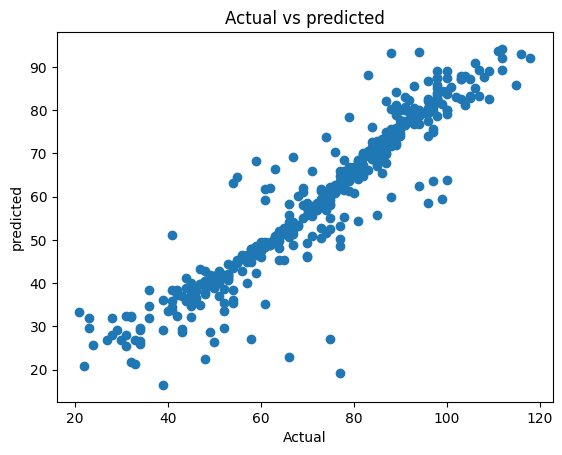

In [55]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, np.squeeze(model1.predict(X_test)) )
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [56]:
y_prd=np.squeeze(np.squeeze(model1.predict(X_test)) )
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

14/14 [==============================] - 0s 2ms/step


,Actual,predict,differences
431,54,44.317398,9.682602
610,64,52.036026,11.963974
795,77,61.714096,15.285904
1238,96,79.303909,16.696091
1228,97,80.677338,16.322662
794,80,60.834690,19.165310
642,67,53.365486,13.634514
416,57,46.471275,10.528725
1410,118,92.025009,25.974991
517,63,50.382542,12.617458


## NN with dense layer

In [57]:
from keras.layers import Dense, Dropout,Activation
from keras.models import Sequential
import numpy as np
from keras.wrappers.scikit_learn import KerasRegressor
model2=Sequential()
model2.add(Dense(128, input_dim=4, activation='relu'))
model2.add(Dense(64,activation='relu'))
model2.add(Dense(1,activation='linear'))
model2.compile(loss='mean_squared_error',optimizer='adam', metrics=['mae'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               640       
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8,961
Trainable params: 8,961
Non-trainable params: 0
_________________________________________________________________


In [58]:
model2.fit(X_train,Y_train ,epochs =2000,batch_size=32,validation_split=0.3)

Epoch 1/2000
22/22 [==============================] - 2s 34ms/step - loss: 1226.0388 - mae: 27.7796 - val_loss: 439.7929 - val_mae: 17.6925
Epoch 2/2000
22/22 [==============================] - 0s 10ms/step - loss: 302.9161 - mae: 14.1896 - val_loss: 108.8124 - val_mae: 8.2227
Epoch 3/2000
22/22 [==============================] - 0s 11ms/step - loss: 63.2589 - mae: 5.6840 - val_loss: 42.3320 - val_mae: 4.6728
Epoch 4/2000
22/22 [==============================] - 0s 12ms/step - loss: 41.1791 - mae: 4.4701 - val_loss: 41.7764 - val_mae: 4.7282
Epoch 5/2000
22/22 [==============================] - 0s 11ms/step - loss: 40.1905 - mae: 4.3576 - val_loss: 40.2087 - val_mae: 4.4893
Epoch 6/2000
22/22 [==============================] - 0s 11ms/step - loss: 40.2427 - mae: 4.3316 - val_loss: 40.0484 - val_mae: 4.6414
Epoch 7/2000
22/22 [==============================] - 0s 11ms/step - loss: 39.5378 - mae: 4.3439 - val_loss: 38.4332 - val_mae: 4.3536
Epoch 8/2000
22/22 [===========================

22/22 [==============================] - 0s 18ms/step - loss: 31.1019 - mae: 3.7781 - val_loss: 29.2659 - val_mae: 3.8764
Epoch 122/2000
22/22 [==============================] - 0s 16ms/step - loss: 30.9054 - mae: 3.7359 - val_loss: 35.5430 - val_mae: 4.3252
Epoch 123/2000
22/22 [==============================] - 0s 22ms/step - loss: 34.8197 - mae: 4.1681 - val_loss: 29.8619 - val_mae: 3.9476
Epoch 124/2000
22/22 [==============================] - 0s 13ms/step - loss: 34.6754 - mae: 4.1439 - val_loss: 31.4077 - val_mae: 4.1616
Epoch 125/2000
22/22 [==============================] - 0s 18ms/step - loss: 31.8497 - mae: 3.8554 - val_loss: 34.0796 - val_mae: 4.1478
Epoch 126/2000
22/22 [==============================] - 0s 19ms/step - loss: 31.6002 - mae: 3.7929 - val_loss: 27.9978 - val_mae: 3.6231
Epoch 127/2000
22/22 [==============================] - 0s 16ms/step - loss: 31.7131 - mae: 3.7781 - val_loss: 32.5209 - val_mae: 4.2864
Epoch 128/2000
22/22 [==============================] - 

Epoch 181/2000
22/22 [==============================] - 0s 22ms/step - loss: 33.4565 - mae: 4.0901 - val_loss: 45.1496 - val_mae: 5.5988
Epoch 182/2000
22/22 [==============================] - 0s 14ms/step - loss: 34.4311 - mae: 4.1791 - val_loss: 28.2380 - val_mae: 3.6909
Epoch 183/2000
22/22 [==============================] - 0s 15ms/step - loss: 30.3466 - mae: 3.7243 - val_loss: 27.6712 - val_mae: 3.5683
Epoch 184/2000
22/22 [==============================] - 0s 10ms/step - loss: 31.3612 - mae: 3.8014 - val_loss: 28.7523 - val_mae: 3.6012
Epoch 185/2000
22/22 [==============================] - 0s 20ms/step - loss: 32.1725 - mae: 3.8764 - val_loss: 34.0644 - val_mae: 4.4294
Epoch 186/2000
22/22 [==============================] - 0s 14ms/step - loss: 35.3575 - mae: 4.2530 - val_loss: 36.1864 - val_mae: 4.3116
Epoch 187/2000
22/22 [==============================] - 0s 17ms/step - loss: 36.2495 - mae: 4.1726 - val_loss: 28.8921 - val_mae: 3.7950
Epoch 188/2000
22/22 [===================

Epoch 241/2000
22/22 [==============================] - 0s 12ms/step - loss: 33.9265 - mae: 4.1417 - val_loss: 31.6616 - val_mae: 4.2220
Epoch 242/2000
22/22 [==============================] - 1s 24ms/step - loss: 31.8548 - mae: 3.8992 - val_loss: 31.7394 - val_mae: 3.9077
Epoch 243/2000
22/22 [==============================] - 0s 13ms/step - loss: 31.1154 - mae: 3.7833 - val_loss: 28.3499 - val_mae: 3.5833
Epoch 244/2000
22/22 [==============================] - 0s 16ms/step - loss: 30.5727 - mae: 3.7193 - val_loss: 28.4754 - val_mae: 3.5707
Epoch 245/2000
22/22 [==============================] - 0s 18ms/step - loss: 31.4636 - mae: 3.7940 - val_loss: 28.6347 - val_mae: 3.5797
Epoch 246/2000
22/22 [==============================] - 0s 15ms/step - loss: 30.5102 - mae: 3.6873 - val_loss: 32.9655 - val_mae: 4.4232
Epoch 247/2000
22/22 [==============================] - 0s 20ms/step - loss: 31.3615 - mae: 3.8226 - val_loss: 27.9240 - val_mae: 3.5796
Epoch 248/2000
22/22 [===================

Epoch 301/2000
22/22 [==============================] - 0s 14ms/step - loss: 30.2685 - mae: 3.7219 - val_loss: 28.2235 - val_mae: 3.6674
Epoch 302/2000
22/22 [==============================] - 0s 18ms/step - loss: 31.6107 - mae: 3.8620 - val_loss: 27.9359 - val_mae: 3.6558
Epoch 303/2000
22/22 [==============================] - 0s 13ms/step - loss: 30.9543 - mae: 3.7749 - val_loss: 29.0485 - val_mae: 3.8233
Epoch 304/2000
22/22 [==============================] - 0s 16ms/step - loss: 32.9173 - mae: 4.0416 - val_loss: 27.7851 - val_mae: 3.6005
Epoch 305/2000
22/22 [==============================] - 0s 12ms/step - loss: 30.3309 - mae: 3.7016 - val_loss: 29.7973 - val_mae: 3.9487
Epoch 306/2000
22/22 [==============================] - 0s 22ms/step - loss: 31.9498 - mae: 3.9768 - val_loss: 37.5135 - val_mae: 4.9319
Epoch 307/2000
22/22 [==============================] - 0s 16ms/step - loss: 33.0609 - mae: 3.9591 - val_loss: 27.2764 - val_mae: 3.5771
Epoch 308/2000
22/22 [===================

Epoch 361/2000
22/22 [==============================] - 0s 18ms/step - loss: 33.0825 - mae: 3.9488 - val_loss: 27.4471 - val_mae: 3.5671
Epoch 362/2000
22/22 [==============================] - 0s 14ms/step - loss: 29.8762 - mae: 3.6364 - val_loss: 30.1634 - val_mae: 4.0717
Epoch 363/2000
22/22 [==============================] - 0s 19ms/step - loss: 32.2811 - mae: 3.9486 - val_loss: 29.2214 - val_mae: 3.9356
Epoch 364/2000
22/22 [==============================] - 0s 11ms/step - loss: 32.5407 - mae: 3.8768 - val_loss: 31.9739 - val_mae: 4.2805
Epoch 365/2000
22/22 [==============================] - 0s 17ms/step - loss: 31.6194 - mae: 3.8386 - val_loss: 28.4975 - val_mae: 3.7782
Epoch 366/2000
22/22 [==============================] - 0s 15ms/step - loss: 31.7356 - mae: 3.8682 - val_loss: 27.9223 - val_mae: 3.5880
Epoch 367/2000
22/22 [==============================] - 0s 18ms/step - loss: 31.8799 - mae: 3.8773 - val_loss: 27.7453 - val_mae: 3.6058
Epoch 368/2000
22/22 [===================

Epoch 421/2000
22/22 [==============================] - 0s 23ms/step - loss: 31.4934 - mae: 3.8374 - val_loss: 28.8352 - val_mae: 3.6328
Epoch 422/2000
22/22 [==============================] - 0s 10ms/step - loss: 30.0514 - mae: 3.7057 - val_loss: 27.9625 - val_mae: 3.6296
Epoch 423/2000
22/22 [==============================] - 0s 21ms/step - loss: 30.8388 - mae: 3.7579 - val_loss: 28.2014 - val_mae: 3.6958
Epoch 424/2000
22/22 [==============================] - 0s 13ms/step - loss: 31.8374 - mae: 3.9935 - val_loss: 27.9074 - val_mae: 3.7368
Epoch 425/2000
22/22 [==============================] - 0s 17ms/step - loss: 29.8756 - mae: 3.6356 - val_loss: 28.1222 - val_mae: 3.5411
Epoch 426/2000
22/22 [==============================] - 0s 15ms/step - loss: 29.6255 - mae: 3.6104 - val_loss: 28.0645 - val_mae: 3.5497
Epoch 427/2000
22/22 [==============================] - 0s 14ms/step - loss: 30.1091 - mae: 3.6850 - val_loss: 31.7886 - val_mae: 3.8893
Epoch 428/2000
22/22 [===================

Epoch 481/2000
22/22 [==============================] - 0s 20ms/step - loss: 31.1399 - mae: 3.8065 - val_loss: 27.9469 - val_mae: 3.5709
Epoch 482/2000
22/22 [==============================] - 1s 25ms/step - loss: 30.2065 - mae: 3.6945 - val_loss: 27.4854 - val_mae: 3.5588
Epoch 483/2000
22/22 [==============================] - 0s 14ms/step - loss: 30.0932 - mae: 3.6939 - val_loss: 27.9987 - val_mae: 3.6231
Epoch 484/2000
22/22 [==============================] - 0s 19ms/step - loss: 30.1700 - mae: 3.6989 - val_loss: 27.8497 - val_mae: 3.5418
Epoch 485/2000
22/22 [==============================] - 0s 17ms/step - loss: 30.6167 - mae: 3.7650 - val_loss: 30.5879 - val_mae: 3.8044
Epoch 486/2000
22/22 [==============================] - 0s 13ms/step - loss: 30.3923 - mae: 3.7075 - val_loss: 28.2501 - val_mae: 3.5519
Epoch 487/2000
22/22 [==============================] - 0s 17ms/step - loss: 29.5437 - mae: 3.6167 - val_loss: 29.8684 - val_mae: 3.7043
Epoch 488/2000
22/22 [===================

Epoch 541/2000
22/22 [==============================] - 0s 13ms/step - loss: 30.5919 - mae: 3.7300 - val_loss: 28.2845 - val_mae: 3.7537
Epoch 542/2000
22/22 [==============================] - 0s 17ms/step - loss: 30.4058 - mae: 3.7956 - val_loss: 31.5321 - val_mae: 3.8545
Epoch 543/2000
22/22 [==============================] - 0s 16ms/step - loss: 31.3432 - mae: 3.8095 - val_loss: 28.4991 - val_mae: 3.5979
Epoch 544/2000
22/22 [==============================] - 0s 16ms/step - loss: 30.1322 - mae: 3.6748 - val_loss: 29.0674 - val_mae: 3.8923
Epoch 545/2000
22/22 [==============================] - 0s 22ms/step - loss: 30.5382 - mae: 3.8364 - val_loss: 27.4939 - val_mae: 3.5894
Epoch 546/2000
22/22 [==============================] - 0s 16ms/step - loss: 30.4486 - mae: 3.6984 - val_loss: 28.0687 - val_mae: 3.7292
Epoch 547/2000
22/22 [==============================] - 0s 16ms/step - loss: 30.4866 - mae: 3.7335 - val_loss: 28.4718 - val_mae: 3.5737
Epoch 548/2000
22/22 [===================

Epoch 601/2000
22/22 [==============================] - 0s 12ms/step - loss: 32.5074 - mae: 4.0174 - val_loss: 29.5039 - val_mae: 3.9002
Epoch 602/2000
22/22 [==============================] - 0s 15ms/step - loss: 29.5177 - mae: 3.6501 - val_loss: 29.0427 - val_mae: 3.6244
Epoch 603/2000
22/22 [==============================] - 0s 19ms/step - loss: 30.1399 - mae: 3.6527 - val_loss: 27.7838 - val_mae: 3.5460
Epoch 604/2000
22/22 [==============================] - 0s 21ms/step - loss: 29.4025 - mae: 3.6044 - val_loss: 27.6412 - val_mae: 3.5404
Epoch 605/2000
22/22 [==============================] - 0s 11ms/step - loss: 30.0727 - mae: 3.7285 - val_loss: 27.3928 - val_mae: 3.5944
Epoch 606/2000
22/22 [==============================] - 0s 17ms/step - loss: 29.2695 - mae: 3.5960 - val_loss: 29.1420 - val_mae: 3.8649
Epoch 607/2000
22/22 [==============================] - 0s 13ms/step - loss: 30.5337 - mae: 3.7837 - val_loss: 27.6917 - val_mae: 3.5879
Epoch 608/2000
22/22 [===================

Epoch 661/2000
22/22 [==============================] - 0s 12ms/step - loss: 29.7628 - mae: 3.7362 - val_loss: 27.3553 - val_mae: 3.5739
Epoch 662/2000
22/22 [==============================] - 0s 19ms/step - loss: 30.2640 - mae: 3.8102 - val_loss: 29.1379 - val_mae: 3.6600
Epoch 663/2000
22/22 [==============================] - 0s 13ms/step - loss: 30.1508 - mae: 3.6988 - val_loss: 27.2828 - val_mae: 3.5090
Epoch 664/2000
22/22 [==============================] - 0s 15ms/step - loss: 29.9268 - mae: 3.7393 - val_loss: 27.7457 - val_mae: 3.6122
Epoch 665/2000
22/22 [==============================] - 0s 15ms/step - loss: 29.6491 - mae: 3.6059 - val_loss: 27.5457 - val_mae: 3.5120
Epoch 666/2000
22/22 [==============================] - 0s 20ms/step - loss: 29.4811 - mae: 3.6296 - val_loss: 27.6331 - val_mae: 3.5776
Epoch 667/2000
22/22 [==============================] - 0s 17ms/step - loss: 28.7919 - mae: 3.5718 - val_loss: 29.4500 - val_mae: 3.7018
Epoch 668/2000
22/22 [===================

Epoch 721/2000
22/22 [==============================] - 0s 12ms/step - loss: 29.4354 - mae: 3.6640 - val_loss: 26.8280 - val_mae: 3.5330
Epoch 722/2000
22/22 [==============================] - 0s 17ms/step - loss: 29.8110 - mae: 3.7090 - val_loss: 28.1468 - val_mae: 3.7413
Epoch 723/2000
22/22 [==============================] - 0s 13ms/step - loss: 30.1041 - mae: 3.6860 - val_loss: 28.0212 - val_mae: 3.5310
Epoch 724/2000
22/22 [==============================] - 0s 22ms/step - loss: 29.2260 - mae: 3.5958 - val_loss: 27.7051 - val_mae: 3.4985
Epoch 725/2000
22/22 [==============================] - 0s 17ms/step - loss: 28.9673 - mae: 3.5767 - val_loss: 27.3065 - val_mae: 3.4855
Epoch 726/2000
22/22 [==============================] - 0s 17ms/step - loss: 29.3282 - mae: 3.6483 - val_loss: 29.3452 - val_mae: 3.6523
Epoch 727/2000
22/22 [==============================] - 0s 21ms/step - loss: 29.6703 - mae: 3.6822 - val_loss: 27.0545 - val_mae: 3.4794
Epoch 728/2000
22/22 [===================

Epoch 781/2000
22/22 [==============================] - 0s 15ms/step - loss: 31.7659 - mae: 3.8544 - val_loss: 29.5791 - val_mae: 3.9778
Epoch 782/2000
22/22 [==============================] - 0s 17ms/step - loss: 29.2873 - mae: 3.6539 - val_loss: 27.0416 - val_mae: 3.5341
Epoch 783/2000
22/22 [==============================] - 0s 17ms/step - loss: 29.1537 - mae: 3.5948 - val_loss: 27.8517 - val_mae: 3.6479
Epoch 784/2000
22/22 [==============================] - 0s 11ms/step - loss: 29.7005 - mae: 3.6415 - val_loss: 27.9469 - val_mae: 3.8528
Epoch 785/2000
22/22 [==============================] - 0s 20ms/step - loss: 29.8823 - mae: 3.6716 - val_loss: 28.0578 - val_mae: 3.7332
Epoch 786/2000
22/22 [==============================] - 0s 14ms/step - loss: 32.8750 - mae: 3.9892 - val_loss: 26.9502 - val_mae: 3.5133
Epoch 787/2000
22/22 [==============================] - 0s 19ms/step - loss: 29.4650 - mae: 3.6394 - val_loss: 26.9545 - val_mae: 3.4610
Epoch 788/2000
22/22 [===================

Epoch 841/2000
22/22 [==============================] - 0s 14ms/step - loss: 29.2770 - mae: 3.6274 - val_loss: 26.8611 - val_mae: 3.5357
Epoch 842/2000
22/22 [==============================] - 0s 14ms/step - loss: 29.6925 - mae: 3.6275 - val_loss: 27.1057 - val_mae: 3.4813
Epoch 843/2000
22/22 [==============================] - 0s 16ms/step - loss: 29.4157 - mae: 3.6229 - val_loss: 28.1325 - val_mae: 3.5786
Epoch 844/2000
22/22 [==============================] - 0s 10ms/step - loss: 29.3078 - mae: 3.6016 - val_loss: 27.9200 - val_mae: 3.5096
Epoch 845/2000
22/22 [==============================] - 0s 17ms/step - loss: 28.6615 - mae: 3.6004 - val_loss: 26.9505 - val_mae: 3.4663
Epoch 846/2000
22/22 [==============================] - 0s 10ms/step - loss: 28.7376 - mae: 3.5461 - val_loss: 26.8638 - val_mae: 3.5268
Epoch 847/2000
22/22 [==============================] - 0s 14ms/step - loss: 29.9101 - mae: 3.7399 - val_loss: 27.4471 - val_mae: 3.5319
Epoch 848/2000
22/22 [===================

Epoch 901/2000
22/22 [==============================] - 0s 13ms/step - loss: 28.9255 - mae: 3.6290 - val_loss: 28.2430 - val_mae: 3.5516
Epoch 902/2000
22/22 [==============================] - 0s 12ms/step - loss: 29.5782 - mae: 3.6261 - val_loss: 27.1260 - val_mae: 3.4941
Epoch 903/2000
22/22 [==============================] - 0s 11ms/step - loss: 29.7399 - mae: 3.6395 - val_loss: 28.5895 - val_mae: 3.5422
Epoch 904/2000
22/22 [==============================] - 0s 17ms/step - loss: 30.8199 - mae: 3.7825 - val_loss: 26.9654 - val_mae: 3.4693
Epoch 905/2000
22/22 [==============================] - 0s 10ms/step - loss: 28.6657 - mae: 3.6200 - val_loss: 28.8015 - val_mae: 3.6115
Epoch 906/2000
22/22 [==============================] - 0s 16ms/step - loss: 28.9251 - mae: 3.5922 - val_loss: 27.1720 - val_mae: 3.4505
Epoch 907/2000
22/22 [==============================] - 0s 12ms/step - loss: 29.4414 - mae: 3.6596 - val_loss: 29.1379 - val_mae: 3.6377
Epoch 908/2000
22/22 [===================

Epoch 961/2000
22/22 [==============================] - 0s 16ms/step - loss: 29.0625 - mae: 3.6534 - val_loss: 27.1519 - val_mae: 3.4607
Epoch 962/2000
22/22 [==============================] - 0s 12ms/step - loss: 29.3844 - mae: 3.6318 - val_loss: 28.9741 - val_mae: 3.6717
Epoch 963/2000
22/22 [==============================] - 0s 17ms/step - loss: 30.1263 - mae: 3.6498 - val_loss: 27.5205 - val_mae: 3.4768
Epoch 964/2000
22/22 [==============================] - 0s 10ms/step - loss: 28.9648 - mae: 3.5872 - val_loss: 26.8769 - val_mae: 3.4254
Epoch 965/2000
22/22 [==============================] - 0s 16ms/step - loss: 29.3739 - mae: 3.5959 - val_loss: 27.6507 - val_mae: 3.4901
Epoch 966/2000
22/22 [==============================] - 0s 11ms/step - loss: 28.9488 - mae: 3.6067 - val_loss: 27.6561 - val_mae: 3.4710
Epoch 967/2000
22/22 [==============================] - 0s 15ms/step - loss: 29.0157 - mae: 3.5475 - val_loss: 27.9014 - val_mae: 3.4664
Epoch 968/2000
22/22 [===================

Epoch 1021/2000
22/22 [==============================] - 0s 14ms/step - loss: 29.2386 - mae: 3.5579 - val_loss: 26.4168 - val_mae: 3.4164
Epoch 1022/2000
22/22 [==============================] - 0s 13ms/step - loss: 29.0334 - mae: 3.6195 - val_loss: 27.1772 - val_mae: 3.4269
Epoch 1023/2000
22/22 [==============================] - 0s 16ms/step - loss: 28.7223 - mae: 3.6075 - val_loss: 27.4096 - val_mae: 3.5320
Epoch 1024/2000
22/22 [==============================] - 0s 13ms/step - loss: 28.1908 - mae: 3.5039 - val_loss: 26.4541 - val_mae: 3.4174
Epoch 1025/2000
22/22 [==============================] - 0s 16ms/step - loss: 28.8211 - mae: 3.5325 - val_loss: 26.8887 - val_mae: 3.4271
Epoch 1026/2000
22/22 [==============================] - 0s 13ms/step - loss: 28.2956 - mae: 3.5332 - val_loss: 26.5116 - val_mae: 3.3902
Epoch 1027/2000
22/22 [==============================] - 0s 15ms/step - loss: 28.7971 - mae: 3.5084 - val_loss: 30.2894 - val_mae: 3.8942
Epoch 1028/2000
22/22 [===========

22/22 [==============================] - 0s 24ms/step - loss: 27.2813 - mae: 3.4010 - val_loss: 28.3095 - val_mae: 3.6222
Epoch 1140/2000
22/22 [==============================] - 1s 40ms/step - loss: 27.5316 - mae: 3.3784 - val_loss: 27.0242 - val_mae: 3.3520
Epoch 1141/2000
22/22 [==============================] - 1s 31ms/step - loss: 27.5945 - mae: 3.4490 - val_loss: 27.2442 - val_mae: 3.4307
Epoch 1142/2000
22/22 [==============================] - 0s 13ms/step - loss: 27.5936 - mae: 3.4876 - val_loss: 27.1422 - val_mae: 3.3848
Epoch 1143/2000
22/22 [==============================] - 1s 27ms/step - loss: 28.2044 - mae: 3.5060 - val_loss: 26.3726 - val_mae: 3.4104
Epoch 1144/2000
22/22 [==============================] - 1s 29ms/step - loss: 27.6110 - mae: 3.4094 - val_loss: 27.3642 - val_mae: 3.5032
Epoch 1145/2000
22/22 [==============================] - 1s 24ms/step - loss: 27.4158 - mae: 3.3889 - val_loss: 26.4671 - val_mae: 3.4237
Epoch 1146/2000
22/22 [===========================

22/22 [==============================] - 0s 19ms/step - loss: 27.8290 - mae: 3.5577 - val_loss: 33.5594 - val_mae: 4.1482
Epoch 1258/2000
22/22 [==============================] - 0s 16ms/step - loss: 28.0143 - mae: 3.5917 - val_loss: 28.0172 - val_mae: 3.6315
Epoch 1259/2000
22/22 [==============================] - 0s 19ms/step - loss: 26.9779 - mae: 3.3481 - val_loss: 27.9301 - val_mae: 3.3974
Epoch 1260/2000
22/22 [==============================] - 0s 23ms/step - loss: 27.3124 - mae: 3.3825 - val_loss: 26.9229 - val_mae: 3.3371
Epoch 1261/2000
22/22 [==============================] - 0s 20ms/step - loss: 27.3756 - mae: 3.3625 - val_loss: 27.1678 - val_mae: 3.4446
Epoch 1262/2000
22/22 [==============================] - 0s 20ms/step - loss: 27.2568 - mae: 3.3850 - val_loss: 26.8115 - val_mae: 3.3157
Epoch 1263/2000
22/22 [==============================] - 0s 20ms/step - loss: 26.5968 - mae: 3.2822 - val_loss: 26.6232 - val_mae: 3.3145
Epoch 1264/2000
22/22 [===========================

22/22 [==============================] - 0s 13ms/step - loss: 27.0413 - mae: 3.4102 - val_loss: 29.9148 - val_mae: 3.6738
Epoch 1376/2000
22/22 [==============================] - 1s 29ms/step - loss: 26.9196 - mae: 3.3653 - val_loss: 27.4991 - val_mae: 3.5577
Epoch 1377/2000
22/22 [==============================] - 1s 32ms/step - loss: 26.5023 - mae: 3.3315 - val_loss: 29.8783 - val_mae: 3.7741
Epoch 1378/2000
22/22 [==============================] - 1s 35ms/step - loss: 27.9925 - mae: 3.4152 - val_loss: 28.0752 - val_mae: 3.3529
Epoch 1379/2000
22/22 [==============================] - 0s 15ms/step - loss: 27.3359 - mae: 3.3792 - val_loss: 28.5824 - val_mae: 3.4675
Epoch 1380/2000
22/22 [==============================] - 0s 20ms/step - loss: 26.3529 - mae: 3.2707 - val_loss: 26.9695 - val_mae: 3.4342
Epoch 1381/2000
22/22 [==============================] - 1s 26ms/step - loss: 27.2718 - mae: 3.4411 - val_loss: 30.1861 - val_mae: 3.7089
Epoch 1382/2000
22/22 [===========================

22/22 [==============================] - 0s 19ms/step - loss: 26.5993 - mae: 3.3290 - val_loss: 27.2069 - val_mae: 3.3283
Epoch 1494/2000
22/22 [==============================] - 0s 17ms/step - loss: 26.8910 - mae: 3.3069 - val_loss: 28.2123 - val_mae: 3.4329
Epoch 1495/2000
22/22 [==============================] - 1s 29ms/step - loss: 26.2431 - mae: 3.3125 - val_loss: 27.3488 - val_mae: 3.3666
Epoch 1496/2000
22/22 [==============================] - 0s 23ms/step - loss: 26.8388 - mae: 3.3835 - val_loss: 31.1765 - val_mae: 3.9650
Epoch 1497/2000
22/22 [==============================] - 0s 19ms/step - loss: 26.5298 - mae: 3.3785 - val_loss: 29.3900 - val_mae: 3.7651
Epoch 1498/2000
22/22 [==============================] - 1s 28ms/step - loss: 28.0298 - mae: 3.5620 - val_loss: 26.4619 - val_mae: 3.2639
Epoch 1499/2000
22/22 [==============================] - 1s 34ms/step - loss: 26.8822 - mae: 3.4486 - val_loss: 27.9169 - val_mae: 3.4349
Epoch 1500/2000
22/22 [===========================

22/22 [==============================] - 0s 16ms/step - loss: 26.7707 - mae: 3.2998 - val_loss: 26.5087 - val_mae: 3.2867
Epoch 1612/2000
22/22 [==============================] - 1s 33ms/step - loss: 26.2134 - mae: 3.2289 - val_loss: 27.5477 - val_mae: 3.4001
Epoch 1613/2000
22/22 [==============================] - 1s 28ms/step - loss: 25.4491 - mae: 3.2278 - val_loss: 27.6033 - val_mae: 3.3528
Epoch 1614/2000
22/22 [==============================] - 1s 36ms/step - loss: 25.7497 - mae: 3.2215 - val_loss: 27.2822 - val_mae: 3.2999
Epoch 1615/2000
22/22 [==============================] - 0s 19ms/step - loss: 27.6188 - mae: 3.5047 - val_loss: 27.7052 - val_mae: 3.5999
Epoch 1616/2000
22/22 [==============================] - 1s 28ms/step - loss: 27.1750 - mae: 3.5333 - val_loss: 27.3085 - val_mae: 3.4493
Epoch 1617/2000
22/22 [==============================] - 1s 32ms/step - loss: 26.8695 - mae: 3.3309 - val_loss: 26.7029 - val_mae: 3.2532
Epoch 1618/2000
22/22 [===========================

22/22 [==============================] - 1s 29ms/step - loss: 28.0460 - mae: 3.4938 - val_loss: 33.1050 - val_mae: 4.0685
Epoch 1730/2000
22/22 [==============================] - 0s 14ms/step - loss: 27.7863 - mae: 3.4753 - val_loss: 27.8283 - val_mae: 3.3824
Epoch 1731/2000
22/22 [==============================] - 1s 27ms/step - loss: 25.5377 - mae: 3.2247 - val_loss: 28.3055 - val_mae: 3.3768
Epoch 1732/2000
22/22 [==============================] - 1s 30ms/step - loss: 25.5595 - mae: 3.2727 - val_loss: 27.1401 - val_mae: 3.3072
Epoch 1733/2000
22/22 [==============================] - 0s 21ms/step - loss: 27.1240 - mae: 3.3786 - val_loss: 32.2016 - val_mae: 4.0112
Epoch 1734/2000
22/22 [==============================] - 1s 25ms/step - loss: 27.6014 - mae: 3.5851 - val_loss: 28.1500 - val_mae: 3.4003
Epoch 1735/2000
22/22 [==============================] - 1s 26ms/step - loss: 27.3633 - mae: 3.4573 - val_loss: 27.8346 - val_mae: 3.4036
Epoch 1736/2000
22/22 [===========================

22/22 [==============================] - 1s 29ms/step - loss: 28.4880 - mae: 3.6120 - val_loss: 32.6446 - val_mae: 4.0167
Epoch 1848/2000
22/22 [==============================] - 0s 16ms/step - loss: 26.4315 - mae: 3.4112 - val_loss: 27.5410 - val_mae: 3.3369
Epoch 1849/2000
22/22 [==============================] - 0s 21ms/step - loss: 25.8258 - mae: 3.2589 - val_loss: 27.6242 - val_mae: 3.4283
Epoch 1850/2000
22/22 [==============================] - 0s 18ms/step - loss: 25.7496 - mae: 3.2185 - val_loss: 27.5871 - val_mae: 3.4248
Epoch 1851/2000
22/22 [==============================] - 0s 23ms/step - loss: 25.9019 - mae: 3.2197 - val_loss: 27.3344 - val_mae: 3.3380
Epoch 1852/2000
22/22 [==============================] - 1s 34ms/step - loss: 25.7614 - mae: 3.2343 - val_loss: 28.5000 - val_mae: 3.3784
Epoch 1853/2000
22/22 [==============================] - 1s 36ms/step - loss: 25.7752 - mae: 3.1861 - val_loss: 28.4305 - val_mae: 3.4839
Epoch 1854/2000
22/22 [===========================

22/22 [==============================] - 1s 30ms/step - loss: 25.2799 - mae: 3.1568 - val_loss: 27.5865 - val_mae: 3.3008
Epoch 1966/2000
22/22 [==============================] - 1s 31ms/step - loss: 25.7400 - mae: 3.2757 - val_loss: 28.0573 - val_mae: 3.4327
Epoch 1967/2000
22/22 [==============================] - 0s 21ms/step - loss: 25.5385 - mae: 3.2226 - val_loss: 27.2592 - val_mae: 3.3432
Epoch 1968/2000
22/22 [==============================] - 0s 23ms/step - loss: 27.0280 - mae: 3.4164 - val_loss: 28.7336 - val_mae: 3.7036
Epoch 1969/2000
22/22 [==============================] - 0s 18ms/step - loss: 26.2038 - mae: 3.3238 - val_loss: 27.7929 - val_mae: 3.3710
Epoch 1970/2000
22/22 [==============================] - 1s 29ms/step - loss: 26.6965 - mae: 3.4358 - val_loss: 28.0286 - val_mae: 3.5231
Epoch 1971/2000
22/22 [==============================] - 1s 24ms/step - loss: 26.1332 - mae: 3.2746 - val_loss: 31.7361 - val_mae: 3.8143
Epoch 1972/2000
22/22 [===========================

In [59]:
from sklearn.metrics import r2_score
r2_score(Y_test, np.squeeze(model2.predict(X_test)) )

14/14 [==============================] - 1s 2ms/step


0.8705020245564554

In [60]:
prediction =np.squeeze(model2.predict([[80,2,2,129]]))
print("Prediction: {}".format(prediction))

1/1 [==============================] - 1s 949ms/step
Prediction: 65.41220092773438


In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, np.squeeze(model2.predict(X_test)) )
mae= mean_absolute_error(Y_test, np.squeeze(model2.predict(X_test)) )
print('mean squired error:', mse)
print('mean absolute error:', mae)

14/14 [==============================] - 0s 2ms/step
mean squired error: 55.89420008087962
mean absolute error: 4.464892837363229


14/14 [==============================] - 1s 2ms/step


Text(0.5, 1.0, 'Actual vs predicted')

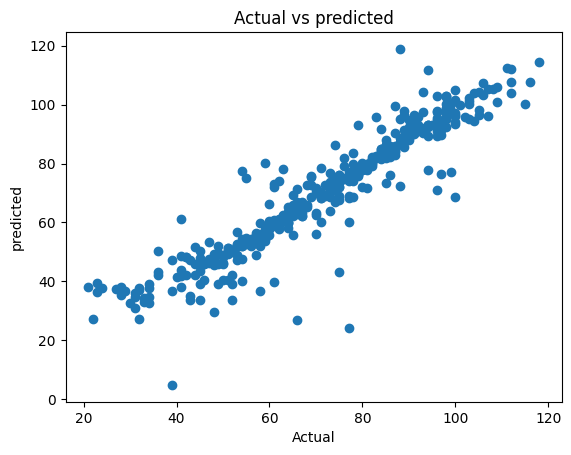

In [62]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, np.squeeze(model2.predict(X_test)) )
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [63]:
y_prd=np.squeeze(np.squeeze(model2.predict(X_test)) )
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

14/14 [==============================] - 0s 2ms/step


,Actual,predict,differences
431,54,51.922176,2.077824
610,64,63.046207,0.953793
795,77,77.083755,-0.083755
1238,96,93.321411,2.678589
1228,97,94.196068,2.803932
794,80,71.907944,8.092056
642,67,65.570938,1.429062
416,57,55.225887,1.774113
1410,118,114.597145,3.402855
517,63,61.840431,1.159569


## RNN

In [64]:
from keras.layers import Dense, Dropout,Activation, LSTM
from keras.models import Sequential
model3=Sequential()
model3.add(LSTM(units=128, activation='relu', return_sequences=True, input_shape=(X_train.shape[1],1)))
model3.add(Dropout(0.2))
model3.add(LSTM(units=64, activation='relu', return_sequences=True))
model3.add(Dropout(0.3))
model3.add(LSTM(units=32, activation='relu', return_sequences=True))
model3.add(Dropout(0.4))
model3.add(LSTM(units=64, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(units=1))
model3.compile(loss='mean_squared_error',optimizer='adam', metrics=['mae'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 128)            66560     
                                                                 
 dropout_1 (Dropout)         (None, 4, 128)            0         
                                                                 
 lstm_1 (LSTM)               (None, 4, 64)             49408     
                                                                 
 dropout_2 (Dropout)         (None, 4, 64)             0         
                                                                 
 lstm_2 (LSTM)               (None, 4, 32)             12416     
                                                                 
 dropout_3 (Dropout)         (None, 4, 32)             0         
                                                                 
 lstm_3 (LSTM)               (None, 64)               

In [65]:
model3.fit(X_train,Y_train ,epochs =2000,batch_size=32,validation_split=0.3)

Epoch 1/2000
22/22 [==============================] - 65s 451ms/step - loss: 3445.7939 - mae: 52.3545 - val_loss: 124.7667 - val_mae: 8.7413
Epoch 2/2000
22/22 [==============================] - 1s 46ms/step - loss: 1034.4115 - mae: 25.8448 - val_loss: 954.4606 - val_mae: 29.2199
Epoch 3/2000
22/22 [==============================] - 1s 47ms/step - loss: 756.7007 - mae: 22.0795 - val_loss: 556.3228 - val_mae: 22.2334
Epoch 4/2000
22/22 [==============================] - 1s 45ms/step - loss: 669.0544 - mae: 19.9283 - val_loss: 187.6639 - val_mae: 11.9484
Epoch 5/2000
22/22 [==============================] - 1s 45ms/step - loss: 565.0119 - mae: 19.1311 - val_loss: 425.5298 - val_mae: 18.4448
Epoch 6/2000
22/22 [==============================] - 1s 38ms/step - loss: 492.1325 - mae: 17.3790 - val_loss: 141.3349 - val_mae: 9.9596
Epoch 7/2000
22/22 [==============================] - 1s 44ms/step - loss: 472.5291 - mae: 16.9118 - val_loss: 369.1701 - val_mae: 16.6257
Epoch 8/2000
22/22 [=====

22/22 [==============================] - 1s 42ms/step - loss: 152.3509 - mae: 9.6583 - val_loss: 142.5098 - val_mae: 10.2401
Epoch 119/2000
22/22 [==============================] - 1s 41ms/step - loss: 161.7347 - mae: 9.8303 - val_loss: 91.3370 - val_mae: 7.9717
Epoch 120/2000
22/22 [==============================] - 1s 51ms/step - loss: 169.0996 - mae: 10.1506 - val_loss: 35.0413 - val_mae: 4.1125
Epoch 121/2000
22/22 [==============================] - 1s 51ms/step - loss: 167.2867 - mae: 9.9353 - val_loss: 39.6130 - val_mae: 4.6474
Epoch 122/2000
22/22 [==============================] - 1s 57ms/step - loss: 180.9549 - mae: 10.6302 - val_loss: 92.8540 - val_mae: 8.0379
Epoch 123/2000
22/22 [==============================] - 1s 54ms/step - loss: 166.1985 - mae: 10.1509 - val_loss: 116.9673 - val_mae: 9.1649
Epoch 124/2000
22/22 [==============================] - 1s 46ms/step - loss: 164.8815 - mae: 10.1086 - val_loss: 76.3436 - val_mae: 7.2098
Epoch 125/2000
22/22 [====================

22/22 [==============================] - 1s 39ms/step - loss: 137.0913 - mae: 9.1918 - val_loss: 43.7555 - val_mae: 5.2056
Epoch 237/2000
22/22 [==============================] - 1s 49ms/step - loss: 134.6283 - mae: 9.1195 - val_loss: 53.5591 - val_mae: 5.9890
Epoch 238/2000
22/22 [==============================] - 1s 48ms/step - loss: 144.2912 - mae: 9.2318 - val_loss: 33.2335 - val_mae: 4.2816
Epoch 239/2000
22/22 [==============================] - 1s 41ms/step - loss: 156.4172 - mae: 9.6439 - val_loss: 86.5033 - val_mae: 7.8155
Epoch 240/2000
22/22 [==============================] - 1s 37ms/step - loss: 139.8101 - mae: 9.2376 - val_loss: 46.5562 - val_mae: 5.2615
Epoch 241/2000
22/22 [==============================] - 1s 37ms/step - loss: 139.0400 - mae: 9.1162 - val_loss: 41.5392 - val_mae: 4.9266
Epoch 242/2000
22/22 [==============================] - 1s 47ms/step - loss: 140.9997 - mae: 9.2130 - val_loss: 55.5889 - val_mae: 6.0726
Epoch 243/2000
22/22 [===========================

22/22 [==============================] - 1s 35ms/step - loss: 140.5946 - mae: 9.2924 - val_loss: 51.2983 - val_mae: 5.7779
Epoch 355/2000
22/22 [==============================] - 1s 37ms/step - loss: 134.3867 - mae: 9.0863 - val_loss: 69.8477 - val_mae: 6.9737
Epoch 356/2000
22/22 [==============================] - 1s 34ms/step - loss: 132.4755 - mae: 8.8942 - val_loss: 35.4801 - val_mae: 4.4402
Epoch 357/2000
22/22 [==============================] - 1s 35ms/step - loss: 146.8468 - mae: 9.3474 - val_loss: 66.6669 - val_mae: 6.7508
Epoch 358/2000
22/22 [==============================] - 1s 40ms/step - loss: 143.2848 - mae: 9.2258 - val_loss: 137.3500 - val_mae: 10.4102
Epoch 359/2000
22/22 [==============================] - 1s 34ms/step - loss: 137.7411 - mae: 9.1177 - val_loss: 45.5212 - val_mae: 5.2254
Epoch 360/2000
22/22 [==============================] - 1s 42ms/step - loss: 133.2598 - mae: 8.8199 - val_loss: 54.0040 - val_mae: 5.9487
Epoch 361/2000
22/22 [=========================

22/22 [==============================] - 1s 40ms/step - loss: 124.1584 - mae: 8.8341 - val_loss: 30.8809 - val_mae: 3.9226
Epoch 473/2000
22/22 [==============================] - 1s 45ms/step - loss: 123.9605 - mae: 8.7806 - val_loss: 55.3942 - val_mae: 5.7402
Epoch 474/2000
22/22 [==============================] - 1s 49ms/step - loss: 131.4064 - mae: 8.9684 - val_loss: 32.8540 - val_mae: 4.1293
Epoch 475/2000
22/22 [==============================] - 1s 41ms/step - loss: 119.6344 - mae: 8.6456 - val_loss: 52.9402 - val_mae: 5.8355
Epoch 476/2000
22/22 [==============================] - 1s 47ms/step - loss: 124.1019 - mae: 8.5887 - val_loss: 45.9186 - val_mae: 5.2173
Epoch 477/2000
22/22 [==============================] - 1s 43ms/step - loss: 119.4294 - mae: 8.4644 - val_loss: 29.0287 - val_mae: 3.8518
Epoch 478/2000
22/22 [==============================] - 1s 39ms/step - loss: 132.1874 - mae: 8.9073 - val_loss: 44.8226 - val_mae: 5.2560
Epoch 479/2000
22/22 [===========================

22/22 [==============================] - 1s 34ms/step - loss: 119.2751 - mae: 8.6121 - val_loss: 30.5814 - val_mae: 3.9186
Epoch 591/2000
22/22 [==============================] - 1s 35ms/step - loss: 123.6210 - mae: 8.5729 - val_loss: 32.2195 - val_mae: 4.1453
Epoch 592/2000
22/22 [==============================] - 1s 43ms/step - loss: 117.3339 - mae: 8.5776 - val_loss: 35.2341 - val_mae: 4.3874
Epoch 593/2000
22/22 [==============================] - 1s 39ms/step - loss: 120.7423 - mae: 8.5447 - val_loss: 39.6373 - val_mae: 4.9363
Epoch 594/2000
22/22 [==============================] - 1s 37ms/step - loss: 115.1476 - mae: 8.1759 - val_loss: 27.9362 - val_mae: 3.6814
Epoch 595/2000
22/22 [==============================] - 1s 35ms/step - loss: 128.8874 - mae: 8.9493 - val_loss: 103.4792 - val_mae: 8.4391
Epoch 596/2000
22/22 [==============================] - 1s 35ms/step - loss: 126.9503 - mae: 8.8085 - val_loss: 59.0924 - val_mae: 6.4648
Epoch 597/2000
22/22 [==========================

22/22 [==============================] - 1s 33ms/step - loss: 102.5883 - mae: 7.9776 - val_loss: 34.1985 - val_mae: 4.2484
Epoch 709/2000
22/22 [==============================] - 1s 32ms/step - loss: 112.1769 - mae: 8.2222 - val_loss: 39.8977 - val_mae: 4.7964
Epoch 710/2000
22/22 [==============================] - 1s 40ms/step - loss: 111.9289 - mae: 8.5830 - val_loss: 29.2654 - val_mae: 3.7088
Epoch 711/2000
22/22 [==============================] - 1s 42ms/step - loss: 110.4227 - mae: 8.3154 - val_loss: 49.9105 - val_mae: 5.6718
Epoch 712/2000
22/22 [==============================] - 1s 37ms/step - loss: 115.6328 - mae: 8.4669 - val_loss: 33.6158 - val_mae: 4.3259
Epoch 713/2000
22/22 [==============================] - 1s 46ms/step - loss: 128.0094 - mae: 8.8159 - val_loss: 33.5342 - val_mae: 4.3283
Epoch 714/2000
22/22 [==============================] - 1s 38ms/step - loss: 111.6905 - mae: 8.2268 - val_loss: 38.2663 - val_mae: 4.5729
Epoch 715/2000
22/22 [===========================

22/22 [==============================] - 1s 26ms/step - loss: 124.9231 - mae: 8.6433 - val_loss: 47.9432 - val_mae: 5.4779
Epoch 827/2000
22/22 [==============================] - 1s 28ms/step - loss: 119.4905 - mae: 8.5635 - val_loss: 30.1416 - val_mae: 3.8655
Epoch 828/2000
22/22 [==============================] - 1s 29ms/step - loss: 113.4680 - mae: 8.3576 - val_loss: 29.8036 - val_mae: 3.7705
Epoch 829/2000
22/22 [==============================] - 1s 28ms/step - loss: 110.4540 - mae: 8.2560 - val_loss: 36.9652 - val_mae: 4.4576
Epoch 830/2000
22/22 [==============================] - 1s 27ms/step - loss: 117.5466 - mae: 8.2931 - val_loss: 50.4592 - val_mae: 5.6894
Epoch 831/2000
22/22 [==============================] - 1s 25ms/step - loss: 112.6647 - mae: 8.2454 - val_loss: 40.9627 - val_mae: 5.0931
Epoch 832/2000
22/22 [==============================] - 1s 29ms/step - loss: 112.6092 - mae: 8.1904 - val_loss: 28.1158 - val_mae: 3.6760
Epoch 833/2000
22/22 [===========================

22/22 [==============================] - 1s 30ms/step - loss: 101.6267 - mae: 7.8411 - val_loss: 42.1223 - val_mae: 5.0534
Epoch 945/2000
22/22 [==============================] - 1s 26ms/step - loss: 116.7378 - mae: 8.4315 - val_loss: 43.8904 - val_mae: 5.1650
Epoch 946/2000
22/22 [==============================] - 1s 35ms/step - loss: 99.2036 - mae: 7.8084 - val_loss: 51.0705 - val_mae: 5.8981
Epoch 947/2000
22/22 [==============================] - 1s 30ms/step - loss: 105.5130 - mae: 8.1386 - val_loss: 28.7232 - val_mae: 3.7158
Epoch 948/2000
22/22 [==============================] - 1s 25ms/step - loss: 118.1383 - mae: 8.4216 - val_loss: 50.5167 - val_mae: 5.5337
Epoch 949/2000
22/22 [==============================] - 1s 30ms/step - loss: 108.3330 - mae: 8.1451 - val_loss: 39.3232 - val_mae: 4.6039
Epoch 950/2000
22/22 [==============================] - 1s 27ms/step - loss: 113.5754 - mae: 8.2888 - val_loss: 36.8345 - val_mae: 4.4748
Epoch 951/2000
22/22 [============================

22/22 [==============================] - 1s 27ms/step - loss: 102.4393 - mae: 8.0213 - val_loss: 28.1618 - val_mae: 3.5931
Epoch 1063/2000
22/22 [==============================] - 1s 26ms/step - loss: 111.6480 - mae: 8.1459 - val_loss: 53.2811 - val_mae: 5.7579
Epoch 1064/2000
22/22 [==============================] - 1s 30ms/step - loss: 104.6666 - mae: 8.0281 - val_loss: 59.9284 - val_mae: 6.3932
Epoch 1065/2000
22/22 [==============================] - 1s 28ms/step - loss: 103.3537 - mae: 7.9849 - val_loss: 28.8330 - val_mae: 3.7331
Epoch 1066/2000
22/22 [==============================] - 1s 28ms/step - loss: 98.8208 - mae: 7.8942 - val_loss: 44.8252 - val_mae: 5.2434
Epoch 1067/2000
22/22 [==============================] - 1s 28ms/step - loss: 93.0215 - mae: 7.6040 - val_loss: 44.2796 - val_mae: 5.1926
Epoch 1068/2000
22/22 [==============================] - 1s 26ms/step - loss: 94.1180 - mae: 7.5061 - val_loss: 43.1782 - val_mae: 5.0511
Epoch 1069/2000
22/22 [=======================

22/22 [==============================] - 1s 34ms/step - loss: 102.0586 - mae: 7.8178 - val_loss: 32.7040 - val_mae: 4.0560
Epoch 1181/2000
22/22 [==============================] - 1s 32ms/step - loss: 97.1757 - mae: 7.6263 - val_loss: 44.1890 - val_mae: 5.2927
Epoch 1182/2000
22/22 [==============================] - 1s 45ms/step - loss: 110.6166 - mae: 8.2318 - val_loss: 37.5859 - val_mae: 4.5845
Epoch 1183/2000
22/22 [==============================] - 1s 37ms/step - loss: 95.3749 - mae: 7.6220 - val_loss: 49.5966 - val_mae: 5.5276
Epoch 1184/2000
22/22 [==============================] - 1s 38ms/step - loss: 97.8011 - mae: 7.5953 - val_loss: 34.1545 - val_mae: 4.2735
Epoch 1185/2000
22/22 [==============================] - 1s 39ms/step - loss: 101.3728 - mae: 7.9421 - val_loss: 38.4474 - val_mae: 4.7465
Epoch 1186/2000
22/22 [==============================] - 1s 42ms/step - loss: 101.4381 - mae: 7.9511 - val_loss: 36.7085 - val_mae: 4.4119
Epoch 1187/2000
22/22 [=======================

22/22 [==============================] - 1s 34ms/step - loss: 100.1847 - mae: 7.7964 - val_loss: 30.6473 - val_mae: 3.9014
Epoch 1299/2000
22/22 [==============================] - 1s 37ms/step - loss: 97.8790 - mae: 7.6818 - val_loss: 38.6218 - val_mae: 4.5195
Epoch 1300/2000
22/22 [==============================] - 1s 43ms/step - loss: 104.9268 - mae: 7.8661 - val_loss: 42.4905 - val_mae: 4.9808
Epoch 1301/2000
22/22 [==============================] - 1s 42ms/step - loss: 105.3373 - mae: 7.9883 - val_loss: 34.0025 - val_mae: 4.0036
Epoch 1302/2000
22/22 [==============================] - 1s 35ms/step - loss: 89.7337 - mae: 7.2699 - val_loss: 35.8391 - val_mae: 4.1172
Epoch 1303/2000
22/22 [==============================] - 1s 29ms/step - loss: 101.8126 - mae: 7.9136 - val_loss: 32.9496 - val_mae: 4.2337
Epoch 1304/2000
22/22 [==============================] - 1s 39ms/step - loss: 91.1122 - mae: 7.4947 - val_loss: 50.9856 - val_mae: 5.3419
Epoch 1305/2000
22/22 [=======================

22/22 [==============================] - 1s 39ms/step - loss: 89.8580 - mae: 7.3549 - val_loss: 39.8942 - val_mae: 4.6639
Epoch 1417/2000
22/22 [==============================] - 1s 36ms/step - loss: 85.4784 - mae: 7.2598 - val_loss: 31.1151 - val_mae: 3.7995
Epoch 1418/2000
22/22 [==============================] - 1s 35ms/step - loss: 93.5707 - mae: 7.4798 - val_loss: 39.7437 - val_mae: 4.8065
Epoch 1419/2000
22/22 [==============================] - 1s 32ms/step - loss: 89.0632 - mae: 7.3284 - val_loss: 29.7220 - val_mae: 3.7521
Epoch 1420/2000
22/22 [==============================] - 1s 35ms/step - loss: 96.9695 - mae: 7.4871 - val_loss: 29.3381 - val_mae: 3.6329
Epoch 1421/2000
22/22 [==============================] - 1s 34ms/step - loss: 100.3569 - mae: 7.7808 - val_loss: 40.3810 - val_mae: 4.8473
Epoch 1422/2000
22/22 [==============================] - 1s 33ms/step - loss: 95.9745 - mae: 7.3992 - val_loss: 34.8327 - val_mae: 4.3695
Epoch 1423/2000
22/22 [==========================

22/22 [==============================] - 1s 29ms/step - loss: 90.3713 - mae: 7.3942 - val_loss: 39.1573 - val_mae: 4.7007
Epoch 1535/2000
22/22 [==============================] - 1s 33ms/step - loss: 97.4353 - mae: 7.6326 - val_loss: 30.4060 - val_mae: 3.8596
Epoch 1536/2000
22/22 [==============================] - 1s 32ms/step - loss: 97.2184 - mae: 7.3856 - val_loss: 31.0788 - val_mae: 3.8578
Epoch 1537/2000
22/22 [==============================] - 1s 31ms/step - loss: 90.3374 - mae: 7.3799 - val_loss: 43.7974 - val_mae: 5.1850
Epoch 1538/2000
22/22 [==============================] - 1s 32ms/step - loss: 89.8534 - mae: 7.4788 - val_loss: 34.8759 - val_mae: 4.1157
Epoch 1539/2000
22/22 [==============================] - 1s 32ms/step - loss: 98.6662 - mae: 7.6798 - val_loss: 55.4652 - val_mae: 6.0724
Epoch 1540/2000
22/22 [==============================] - 1s 28ms/step - loss: 90.5129 - mae: 7.3775 - val_loss: 39.3071 - val_mae: 4.7701
Epoch 1541/2000
22/22 [===========================

22/22 [==============================] - 1s 33ms/step - loss: 89.2160 - mae: 7.1632 - val_loss: 39.2169 - val_mae: 4.5263
Epoch 1653/2000
22/22 [==============================] - 1s 28ms/step - loss: 90.6593 - mae: 7.2647 - val_loss: 34.2680 - val_mae: 3.8932
Epoch 1654/2000
22/22 [==============================] - 1s 30ms/step - loss: 84.0751 - mae: 7.2209 - val_loss: 32.3759 - val_mae: 3.9954
Epoch 1655/2000
22/22 [==============================] - 1s 29ms/step - loss: 86.4916 - mae: 7.0522 - val_loss: 33.4616 - val_mae: 4.0403
Epoch 1656/2000
22/22 [==============================] - 1s 35ms/step - loss: 93.3667 - mae: 7.5527 - val_loss: 39.0072 - val_mae: 4.7204
Epoch 1657/2000
22/22 [==============================] - 1s 33ms/step - loss: 89.3306 - mae: 7.2601 - val_loss: 40.5892 - val_mae: 4.8872
Epoch 1658/2000
22/22 [==============================] - 1s 33ms/step - loss: 77.8844 - mae: 6.7844 - val_loss: 37.6363 - val_mae: 4.4216
Epoch 1659/2000
22/22 [===========================

22/22 [==============================] - 1s 34ms/step - loss: 82.9286 - mae: 7.0574 - val_loss: 41.2956 - val_mae: 4.8351
Epoch 1771/2000
22/22 [==============================] - 1s 32ms/step - loss: 79.1797 - mae: 6.8684 - val_loss: 40.4719 - val_mae: 4.8502
Epoch 1772/2000
22/22 [==============================] - 1s 34ms/step - loss: 84.0470 - mae: 7.1196 - val_loss: 33.0463 - val_mae: 3.9673
Epoch 1773/2000
22/22 [==============================] - 1s 33ms/step - loss: 82.9207 - mae: 7.0686 - val_loss: 32.0561 - val_mae: 3.6828
Epoch 1774/2000
22/22 [==============================] - 1s 31ms/step - loss: 82.7584 - mae: 6.9130 - val_loss: 30.4609 - val_mae: 3.6806
Epoch 1775/2000
22/22 [==============================] - 1s 33ms/step - loss: 82.3447 - mae: 7.0546 - val_loss: 31.7572 - val_mae: 3.7363
Epoch 1776/2000
22/22 [==============================] - 1s 33ms/step - loss: 89.6184 - mae: 7.1909 - val_loss: 44.2692 - val_mae: 5.0561
Epoch 1777/2000
22/22 [===========================

22/22 [==============================] - 1s 35ms/step - loss: 85.4346 - mae: 7.1902 - val_loss: 55.9261 - val_mae: 6.1789
Epoch 1889/2000
22/22 [==============================] - 1s 29ms/step - loss: 86.0097 - mae: 7.0841 - val_loss: 41.3472 - val_mae: 4.8551
Epoch 1890/2000
22/22 [==============================] - 1s 35ms/step - loss: 83.2039 - mae: 7.0525 - val_loss: 32.8284 - val_mae: 3.8159
Epoch 1891/2000
22/22 [==============================] - 1s 40ms/step - loss: 80.7307 - mae: 7.1020 - val_loss: 39.0628 - val_mae: 4.7715
Epoch 1892/2000
22/22 [==============================] - 1s 39ms/step - loss: 78.6472 - mae: 6.8075 - val_loss: 47.4193 - val_mae: 5.3779
Epoch 1893/2000
22/22 [==============================] - 1s 38ms/step - loss: 75.9488 - mae: 6.7698 - val_loss: 31.5813 - val_mae: 3.7779
Epoch 1894/2000
22/22 [==============================] - 1s 36ms/step - loss: 91.8079 - mae: 7.2841 - val_loss: 31.5054 - val_mae: 3.8120
Epoch 1895/2000
22/22 [===========================

In [66]:
from sklearn.metrics import r2_score
r2_score(Y_test, np.squeeze(model3.predict(X_test)) )

14/14 [==============================] - 9s 14ms/step


0.8561644632816492

In [67]:
prediction =np.squeeze(model3.predict([[80,2,2,129]]))
print("Prediction: {}".format(prediction))

1/1 [==============================] - 9s 9s/step
Prediction: 75.5189208984375


In [68]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, np.squeeze(model3.predict(X_test)) )
mae= mean_absolute_error(Y_test, np.squeeze(model3.predict(X_test)) )
print('mean squired error:', mse)
print('mean absolute error:', mae)

14/14 [==============================] - 0s 11ms/step
mean squired error: 62.08260971293025
mean absolute error: 5.199214469658937


14/14 [==============================] - 0s 13ms/step


Text(0.5, 1.0, 'Actual vs predicted')

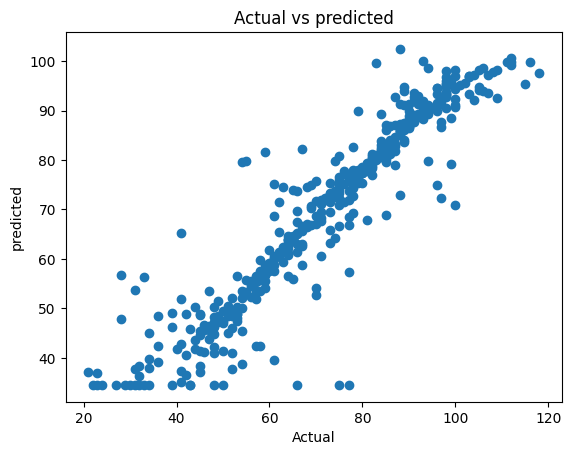

In [69]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, np.squeeze(model3.predict(X_test)) )
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [70]:
y_prd=np.squeeze(np.squeeze(model3.predict(X_test)) )
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

14/14 [==============================] - 0s 10ms/step


,Actual,predict,differences
431,54,53.523827,0.476173
610,64,64.707573,-0.707573
795,77,76.304001,0.695999
1238,96,90.950333,5.049667
1228,97,91.827019,5.172981
794,80,75.403015,4.596985
642,67,66.614250,0.385750
416,57,55.850685,1.149315
1410,118,97.669640,20.330360
517,63,61.692696,1.307304


## keras tuner with dense

In [71]:
from tensorflow import keras
from keras import layers
from keras.layers import Dense
from kerastuner.tuners import RandomSearch
def build_model(hp):
    model2= keras.Sequential()
    for i in range(hp.Int('num_layers',2,20)):
        model2.add(layers.Dense(units=hp.Int('units_' + str(i),
                                           min_value=32,
                                           max_value=512,
                                           step=32),
                              activation='relu'))
        model2.add(layers.Dense(1, activation='linear',name='Dense_1'))
        model2.compile(
              optimizer=keras.optimizers.Adam(
                 hp.Choice('learning rate', [1e-1,1e-2,1e-3,1e-4,1e-5])),
              loss='mean_absolute_error',
              metrics=['mean_absolute_error'])
        return model2

C:\Users\rafi\AppData\Local\Temp\ipykernel_8600\1490801469.py:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [72]:
tuner=RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=50, executions_per_trial=3,directory='project1',project_name='A1')

INFO:tensorflow:Reloading Oracle from existing project project1\A1\oracle.json
INFO:tensorflow:Reloading Tuner from project1\A1\tuner0.json


In [73]:
tuner.search(X_train,Y_train ,epochs=100,validation_data=(X_test,Y_test))

INFO:tensorflow:Oracle triggered exit


In [74]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

In [75]:
model4 = tuner.hypermodel.build(best_hps)
model4.fit(X_train, Y_train, epochs=2000,batch_size=32, validation_split=0.3)

Epoch 1/2000
22/22 [==============================] - 8s 101ms/step - loss: 71.9853 - mean_absolute_error: 71.9853 - val_loss: 11.5846 - val_mean_absolute_error: 11.5846
Epoch 2/2000
22/22 [==============================] - 1s 24ms/step - loss: 7.4959 - mean_absolute_error: 7.4959 - val_loss: 4.7614 - val_mean_absolute_error: 4.7614
Epoch 3/2000
22/22 [==============================] - 1s 25ms/step - loss: 4.9133 - mean_absolute_error: 4.9133 - val_loss: 4.3424 - val_mean_absolute_error: 4.3424
Epoch 4/2000
22/22 [==============================] - 0s 21ms/step - loss: 4.9170 - mean_absolute_error: 4.9170 - val_loss: 10.8642 - val_mean_absolute_error: 10.8642
Epoch 5/2000
22/22 [==============================] - 0s 15ms/step - loss: 6.1257 - mean_absolute_error: 6.1257 - val_loss: 7.1556 - val_mean_absolute_error: 7.1556
Epoch 6/2000
22/22 [==============================] - 0s 14ms/step - loss: 5.7780 - mean_absolute_error: 5.7780 - val_loss: 4.4949 - val_mean_absolute_error: 4.4949
Epo

22/22 [==============================] - 0s 17ms/step - loss: 4.7794 - mean_absolute_error: 4.7794 - val_loss: 3.7549 - val_mean_absolute_error: 3.7549
Epoch 100/2000
22/22 [==============================] - 0s 16ms/step - loss: 4.8791 - mean_absolute_error: 4.8791 - val_loss: 3.8641 - val_mean_absolute_error: 3.8641
Epoch 101/2000
22/22 [==============================] - 0s 21ms/step - loss: 4.1133 - mean_absolute_error: 4.1133 - val_loss: 4.3247 - val_mean_absolute_error: 4.3247
Epoch 102/2000
22/22 [==============================] - 0s 11ms/step - loss: 4.7083 - mean_absolute_error: 4.7083 - val_loss: 3.8739 - val_mean_absolute_error: 3.8739
Epoch 103/2000
22/22 [==============================] - 0s 16ms/step - loss: 4.6248 - mean_absolute_error: 4.6248 - val_loss: 4.1809 - val_mean_absolute_error: 4.1809
Epoch 104/2000
22/22 [==============================] - 0s 14ms/step - loss: 4.8759 - mean_absolute_error: 4.8759 - val_loss: 6.9343 - val_mean_absolute_error: 6.9343
Epoch 105/200

22/22 [==============================] - 0s 21ms/step - loss: 6.7680 - mean_absolute_error: 6.7680 - val_loss: 5.6261 - val_mean_absolute_error: 5.6261
Epoch 198/2000
22/22 [==============================] - 0s 14ms/step - loss: 6.4965 - mean_absolute_error: 6.4965 - val_loss: 4.3356 - val_mean_absolute_error: 4.3356
Epoch 199/2000
22/22 [==============================] - 0s 16ms/step - loss: 4.2884 - mean_absolute_error: 4.2884 - val_loss: 4.7259 - val_mean_absolute_error: 4.7259
Epoch 200/2000
22/22 [==============================] - 0s 20ms/step - loss: 4.2531 - mean_absolute_error: 4.2531 - val_loss: 3.7745 - val_mean_absolute_error: 3.7745
Epoch 201/2000
22/22 [==============================] - 0s 17ms/step - loss: 4.1176 - mean_absolute_error: 4.1176 - val_loss: 6.3071 - val_mean_absolute_error: 6.3071
Epoch 202/2000
22/22 [==============================] - 0s 18ms/step - loss: 4.6172 - mean_absolute_error: 4.6172 - val_loss: 4.8172 - val_mean_absolute_error: 4.8172
Epoch 203/200

22/22 [==============================] - 0s 18ms/step - loss: 4.2676 - mean_absolute_error: 4.2676 - val_loss: 3.8834 - val_mean_absolute_error: 3.8834
Epoch 296/2000
22/22 [==============================] - 0s 20ms/step - loss: 4.4881 - mean_absolute_error: 4.4881 - val_loss: 3.8359 - val_mean_absolute_error: 3.8359
Epoch 297/2000
22/22 [==============================] - 0s 10ms/step - loss: 4.9336 - mean_absolute_error: 4.9336 - val_loss: 4.0394 - val_mean_absolute_error: 4.0394
Epoch 298/2000
22/22 [==============================] - 0s 18ms/step - loss: 4.5064 - mean_absolute_error: 4.5064 - val_loss: 4.8340 - val_mean_absolute_error: 4.8340
Epoch 299/2000
22/22 [==============================] - 0s 14ms/step - loss: 5.3230 - mean_absolute_error: 5.3230 - val_loss: 4.6145 - val_mean_absolute_error: 4.6145
Epoch 300/2000
22/22 [==============================] - 0s 16ms/step - loss: 5.0393 - mean_absolute_error: 5.0393 - val_loss: 4.9253 - val_mean_absolute_error: 4.9253
Epoch 301/200

22/22 [==============================] - 0s 14ms/step - loss: 4.4800 - mean_absolute_error: 4.4800 - val_loss: 4.4577 - val_mean_absolute_error: 4.4577
Epoch 394/2000
22/22 [==============================] - 1s 24ms/step - loss: 5.0627 - mean_absolute_error: 5.0627 - val_loss: 4.1098 - val_mean_absolute_error: 4.1098
Epoch 395/2000
22/22 [==============================] - 0s 20ms/step - loss: 4.7529 - mean_absolute_error: 4.7529 - val_loss: 4.5916 - val_mean_absolute_error: 4.5916
Epoch 396/2000
22/22 [==============================] - 0s 18ms/step - loss: 4.4071 - mean_absolute_error: 4.4071 - val_loss: 4.1421 - val_mean_absolute_error: 4.1421
Epoch 397/2000
22/22 [==============================] - 0s 15ms/step - loss: 4.7738 - mean_absolute_error: 4.7738 - val_loss: 4.0458 - val_mean_absolute_error: 4.0458
Epoch 398/2000
22/22 [==============================] - 0s 14ms/step - loss: 4.4961 - mean_absolute_error: 4.4961 - val_loss: 6.7632 - val_mean_absolute_error: 6.7632
Epoch 399/200

22/22 [==============================] - 0s 9ms/step - loss: 5.2725 - mean_absolute_error: 5.2725 - val_loss: 4.4910 - val_mean_absolute_error: 4.4910
Epoch 492/2000
22/22 [==============================] - 0s 23ms/step - loss: 4.5180 - mean_absolute_error: 4.5180 - val_loss: 4.0867 - val_mean_absolute_error: 4.0867
Epoch 493/2000
22/22 [==============================] - 0s 20ms/step - loss: 4.6920 - mean_absolute_error: 4.6920 - val_loss: 6.1931 - val_mean_absolute_error: 6.1931
Epoch 494/2000
22/22 [==============================] - 0s 19ms/step - loss: 4.6895 - mean_absolute_error: 4.6895 - val_loss: 4.2131 - val_mean_absolute_error: 4.2131
Epoch 495/2000
22/22 [==============================] - 0s 18ms/step - loss: 5.1279 - mean_absolute_error: 5.1279 - val_loss: 5.0330 - val_mean_absolute_error: 5.0330
Epoch 496/2000
22/22 [==============================] - 0s 16ms/step - loss: 5.1867 - mean_absolute_error: 5.1867 - val_loss: 5.7625 - val_mean_absolute_error: 5.7625
Epoch 497/2000

22/22 [==============================] - 0s 19ms/step - loss: 5.1960 - mean_absolute_error: 5.1960 - val_loss: 4.6073 - val_mean_absolute_error: 4.6073
Epoch 590/2000
22/22 [==============================] - 0s 14ms/step - loss: 5.6131 - mean_absolute_error: 5.6131 - val_loss: 4.3562 - val_mean_absolute_error: 4.3562
Epoch 591/2000
22/22 [==============================] - 0s 17ms/step - loss: 4.5735 - mean_absolute_error: 4.5735 - val_loss: 4.5416 - val_mean_absolute_error: 4.5416
Epoch 592/2000
22/22 [==============================] - 0s 17ms/step - loss: 4.5374 - mean_absolute_error: 4.5374 - val_loss: 4.7118 - val_mean_absolute_error: 4.7118
Epoch 593/2000
22/22 [==============================] - 0s 22ms/step - loss: 5.1387 - mean_absolute_error: 5.1387 - val_loss: 5.5437 - val_mean_absolute_error: 5.5437
Epoch 594/2000
22/22 [==============================] - 0s 16ms/step - loss: 4.9692 - mean_absolute_error: 4.9692 - val_loss: 7.3141 - val_mean_absolute_error: 7.3141
Epoch 595/200

22/22 [==============================] - 0s 19ms/step - loss: 4.6052 - mean_absolute_error: 4.6052 - val_loss: 8.3611 - val_mean_absolute_error: 8.3611
Epoch 688/2000
22/22 [==============================] - 0s 19ms/step - loss: 5.2217 - mean_absolute_error: 5.2217 - val_loss: 4.9134 - val_mean_absolute_error: 4.9134
Epoch 689/2000
22/22 [==============================] - 0s 23ms/step - loss: 4.5299 - mean_absolute_error: 4.5299 - val_loss: 5.9381 - val_mean_absolute_error: 5.9381
Epoch 690/2000
22/22 [==============================] - 0s 17ms/step - loss: 4.6664 - mean_absolute_error: 4.6664 - val_loss: 4.5141 - val_mean_absolute_error: 4.5141
Epoch 691/2000
22/22 [==============================] - 0s 17ms/step - loss: 4.3421 - mean_absolute_error: 4.3421 - val_loss: 4.3982 - val_mean_absolute_error: 4.3982
Epoch 692/2000
22/22 [==============================] - 0s 22ms/step - loss: 5.1064 - mean_absolute_error: 5.1064 - val_loss: 4.1158 - val_mean_absolute_error: 4.1158
Epoch 693/200

22/22 [==============================] - 0s 16ms/step - loss: 4.9647 - mean_absolute_error: 4.9647 - val_loss: 4.9844 - val_mean_absolute_error: 4.9844
Epoch 786/2000
22/22 [==============================] - 1s 25ms/step - loss: 5.7727 - mean_absolute_error: 5.7727 - val_loss: 5.1469 - val_mean_absolute_error: 5.1469
Epoch 787/2000
22/22 [==============================] - 0s 21ms/step - loss: 4.5482 - mean_absolute_error: 4.5482 - val_loss: 4.7494 - val_mean_absolute_error: 4.7494
Epoch 788/2000
22/22 [==============================] - 1s 33ms/step - loss: 5.4353 - mean_absolute_error: 5.4353 - val_loss: 5.7878 - val_mean_absolute_error: 5.7878
Epoch 789/2000
22/22 [==============================] - 0s 18ms/step - loss: 6.0976 - mean_absolute_error: 6.0976 - val_loss: 4.7952 - val_mean_absolute_error: 4.7952
Epoch 790/2000
22/22 [==============================] - 1s 29ms/step - loss: 5.5039 - mean_absolute_error: 5.5039 - val_loss: 4.1054 - val_mean_absolute_error: 4.1054
Epoch 791/200

22/22 [==============================] - 1s 24ms/step - loss: 5.3460 - mean_absolute_error: 5.3460 - val_loss: 7.4653 - val_mean_absolute_error: 7.4653
Epoch 884/2000
22/22 [==============================] - 1s 30ms/step - loss: 5.7594 - mean_absolute_error: 5.7594 - val_loss: 4.7184 - val_mean_absolute_error: 4.7184
Epoch 885/2000
22/22 [==============================] - 1s 33ms/step - loss: 4.9317 - mean_absolute_error: 4.9317 - val_loss: 4.2244 - val_mean_absolute_error: 4.2244
Epoch 886/2000
22/22 [==============================] - 0s 20ms/step - loss: 4.4484 - mean_absolute_error: 4.4484 - val_loss: 4.0967 - val_mean_absolute_error: 4.0967
Epoch 887/2000
22/22 [==============================] - 0s 14ms/step - loss: 4.8013 - mean_absolute_error: 4.8013 - val_loss: 4.2657 - val_mean_absolute_error: 4.2657
Epoch 888/2000
22/22 [==============================] - 1s 31ms/step - loss: 4.8832 - mean_absolute_error: 4.8832 - val_loss: 4.7883 - val_mean_absolute_error: 4.7883
Epoch 889/200

22/22 [==============================] - 0s 23ms/step - loss: 4.4679 - mean_absolute_error: 4.4679 - val_loss: 4.0577 - val_mean_absolute_error: 4.0577
Epoch 982/2000
22/22 [==============================] - 0s 17ms/step - loss: 4.4867 - mean_absolute_error: 4.4867 - val_loss: 4.1719 - val_mean_absolute_error: 4.1719
Epoch 983/2000
22/22 [==============================] - 0s 21ms/step - loss: 4.5729 - mean_absolute_error: 4.5729 - val_loss: 5.5548 - val_mean_absolute_error: 5.5548
Epoch 984/2000
22/22 [==============================] - 1s 27ms/step - loss: 4.5953 - mean_absolute_error: 4.5953 - val_loss: 4.7417 - val_mean_absolute_error: 4.7417
Epoch 985/2000
22/22 [==============================] - 0s 21ms/step - loss: 5.1831 - mean_absolute_error: 5.1831 - val_loss: 6.1676 - val_mean_absolute_error: 6.1676
Epoch 986/2000
22/22 [==============================] - 1s 25ms/step - loss: 5.2315 - mean_absolute_error: 5.2315 - val_loss: 4.9008 - val_mean_absolute_error: 4.9008
Epoch 987/200

Epoch 1030/2000
22/22 [==============================] - 1s 36ms/step - loss: 5.5072 - mean_absolute_error: 5.5072 - val_loss: 4.2274 - val_mean_absolute_error: 4.2274
Epoch 1031/2000
22/22 [==============================] - 0s 23ms/step - loss: 4.9945 - mean_absolute_error: 4.9945 - val_loss: 4.1548 - val_mean_absolute_error: 4.1548
Epoch 1032/2000
22/22 [==============================] - 1s 26ms/step - loss: 4.4820 - mean_absolute_error: 4.4820 - val_loss: 4.9226 - val_mean_absolute_error: 4.9226
Epoch 1033/2000
22/22 [==============================] - 0s 14ms/step - loss: 5.1013 - mean_absolute_error: 5.1013 - val_loss: 4.9018 - val_mean_absolute_error: 4.9018
Epoch 1034/2000
22/22 [==============================] - 1s 27ms/step - loss: 4.9603 - mean_absolute_error: 4.9603 - val_loss: 4.4629 - val_mean_absolute_error: 4.4629
Epoch 1035/2000
22/22 [==============================] - 1s 30ms/step - loss: 4.3419 - mean_absolute_error: 4.3419 - val_loss: 4.5102 - val_mean_absolute_error:

Epoch 1079/2000
22/22 [==============================] - 0s 18ms/step - loss: 4.9514 - mean_absolute_error: 4.9514 - val_loss: 4.3871 - val_mean_absolute_error: 4.3871
Epoch 1080/2000
22/22 [==============================] - 1s 30ms/step - loss: 4.6638 - mean_absolute_error: 4.6638 - val_loss: 4.2891 - val_mean_absolute_error: 4.2891
Epoch 1081/2000
22/22 [==============================] - 0s 20ms/step - loss: 4.5852 - mean_absolute_error: 4.5852 - val_loss: 4.6284 - val_mean_absolute_error: 4.6284
Epoch 1082/2000
22/22 [==============================] - 1s 26ms/step - loss: 4.4392 - mean_absolute_error: 4.4392 - val_loss: 4.6922 - val_mean_absolute_error: 4.6922
Epoch 1083/2000
22/22 [==============================] - 1s 28ms/step - loss: 4.4151 - mean_absolute_error: 4.4151 - val_loss: 4.5950 - val_mean_absolute_error: 4.5950
Epoch 1084/2000
22/22 [==============================] - 0s 20ms/step - loss: 5.8051 - mean_absolute_error: 5.8051 - val_loss: 8.3797 - val_mean_absolute_error:

Epoch 1128/2000
22/22 [==============================] - 1s 30ms/step - loss: 4.4288 - mean_absolute_error: 4.4288 - val_loss: 4.7576 - val_mean_absolute_error: 4.7576
Epoch 1129/2000
22/22 [==============================] - 0s 23ms/step - loss: 4.6836 - mean_absolute_error: 4.6836 - val_loss: 4.2529 - val_mean_absolute_error: 4.2529
Epoch 1130/2000
22/22 [==============================] - 0s 22ms/step - loss: 4.5420 - mean_absolute_error: 4.5420 - val_loss: 4.5373 - val_mean_absolute_error: 4.5373
Epoch 1131/2000
22/22 [==============================] - 0s 18ms/step - loss: 4.5433 - mean_absolute_error: 4.5433 - val_loss: 4.1454 - val_mean_absolute_error: 4.1454
Epoch 1132/2000
22/22 [==============================] - 1s 24ms/step - loss: 4.5138 - mean_absolute_error: 4.5138 - val_loss: 4.4922 - val_mean_absolute_error: 4.4922
Epoch 1133/2000
22/22 [==============================] - 0s 17ms/step - loss: 4.6822 - mean_absolute_error: 4.6822 - val_loss: 4.0670 - val_mean_absolute_error:

Epoch 1177/2000
22/22 [==============================] - 1s 30ms/step - loss: 4.5571 - mean_absolute_error: 4.5571 - val_loss: 4.4661 - val_mean_absolute_error: 4.4661
Epoch 1178/2000
22/22 [==============================] - 0s 17ms/step - loss: 4.5339 - mean_absolute_error: 4.5339 - val_loss: 4.2454 - val_mean_absolute_error: 4.2454
Epoch 1179/2000
22/22 [==============================] - 1s 29ms/step - loss: 4.5354 - mean_absolute_error: 4.5354 - val_loss: 4.5443 - val_mean_absolute_error: 4.5443
Epoch 1180/2000
22/22 [==============================] - 1s 34ms/step - loss: 4.6977 - mean_absolute_error: 4.6977 - val_loss: 4.3433 - val_mean_absolute_error: 4.3433
Epoch 1181/2000
22/22 [==============================] - 0s 17ms/step - loss: 4.7337 - mean_absolute_error: 4.7337 - val_loss: 4.6597 - val_mean_absolute_error: 4.6597
Epoch 1182/2000
22/22 [==============================] - 0s 22ms/step - loss: 4.6843 - mean_absolute_error: 4.6843 - val_loss: 6.5484 - val_mean_absolute_error:

Epoch 1226/2000
22/22 [==============================] - 0s 17ms/step - loss: 4.3883 - mean_absolute_error: 4.3883 - val_loss: 4.4832 - val_mean_absolute_error: 4.4832
Epoch 1227/2000
22/22 [==============================] - 0s 22ms/step - loss: 4.5442 - mean_absolute_error: 4.5442 - val_loss: 4.0553 - val_mean_absolute_error: 4.0553
Epoch 1228/2000
22/22 [==============================] - 0s 20ms/step - loss: 4.6062 - mean_absolute_error: 4.6062 - val_loss: 4.0524 - val_mean_absolute_error: 4.0524
Epoch 1229/2000
22/22 [==============================] - 1s 25ms/step - loss: 4.4707 - mean_absolute_error: 4.4707 - val_loss: 4.4428 - val_mean_absolute_error: 4.4428
Epoch 1230/2000
22/22 [==============================] - 0s 23ms/step - loss: 4.3920 - mean_absolute_error: 4.3920 - val_loss: 4.9978 - val_mean_absolute_error: 4.9978
Epoch 1231/2000
22/22 [==============================] - 0s 14ms/step - loss: 4.6288 - mean_absolute_error: 4.6288 - val_loss: 4.0834 - val_mean_absolute_error:

Epoch 1275/2000
22/22 [==============================] - 0s 20ms/step - loss: 4.5458 - mean_absolute_error: 4.5458 - val_loss: 4.8762 - val_mean_absolute_error: 4.8762
Epoch 1276/2000
22/22 [==============================] - 1s 27ms/step - loss: 4.6106 - mean_absolute_error: 4.6106 - val_loss: 4.0734 - val_mean_absolute_error: 4.0734
Epoch 1277/2000
22/22 [==============================] - 0s 22ms/step - loss: 4.7670 - mean_absolute_error: 4.7670 - val_loss: 4.5787 - val_mean_absolute_error: 4.5787
Epoch 1278/2000
22/22 [==============================] - 1s 26ms/step - loss: 5.1418 - mean_absolute_error: 5.1418 - val_loss: 4.0949 - val_mean_absolute_error: 4.0949
Epoch 1279/2000
22/22 [==============================] - 1s 25ms/step - loss: 4.9669 - mean_absolute_error: 4.9669 - val_loss: 4.3797 - val_mean_absolute_error: 4.3797
Epoch 1280/2000
22/22 [==============================] - 0s 18ms/step - loss: 5.0102 - mean_absolute_error: 5.0102 - val_loss: 5.1959 - val_mean_absolute_error:

Epoch 1324/2000
22/22 [==============================] - 0s 22ms/step - loss: 4.7704 - mean_absolute_error: 4.7704 - val_loss: 4.1881 - val_mean_absolute_error: 4.1881
Epoch 1325/2000
22/22 [==============================] - 0s 18ms/step - loss: 4.6956 - mean_absolute_error: 4.6956 - val_loss: 4.1544 - val_mean_absolute_error: 4.1544
Epoch 1326/2000
22/22 [==============================] - 1s 23ms/step - loss: 4.5747 - mean_absolute_error: 4.5747 - val_loss: 4.1598 - val_mean_absolute_error: 4.1598
Epoch 1327/2000
22/22 [==============================] - 0s 16ms/step - loss: 4.5702 - mean_absolute_error: 4.5702 - val_loss: 4.1531 - val_mean_absolute_error: 4.1531
Epoch 1328/2000
22/22 [==============================] - 1s 28ms/step - loss: 4.4947 - mean_absolute_error: 4.4947 - val_loss: 4.2731 - val_mean_absolute_error: 4.2731
Epoch 1329/2000
22/22 [==============================] - 0s 22ms/step - loss: 4.6872 - mean_absolute_error: 4.6872 - val_loss: 4.1360 - val_mean_absolute_error:

Epoch 1373/2000
22/22 [==============================] - 0s 14ms/step - loss: 4.5169 - mean_absolute_error: 4.5169 - val_loss: 4.1308 - val_mean_absolute_error: 4.1308
Epoch 1374/2000
22/22 [==============================] - 1s 24ms/step - loss: 4.3073 - mean_absolute_error: 4.3073 - val_loss: 4.5048 - val_mean_absolute_error: 4.5048
Epoch 1375/2000
22/22 [==============================] - 0s 17ms/step - loss: 4.4939 - mean_absolute_error: 4.4939 - val_loss: 4.6349 - val_mean_absolute_error: 4.6349
Epoch 1376/2000
22/22 [==============================] - 1s 32ms/step - loss: 4.4626 - mean_absolute_error: 4.4626 - val_loss: 4.6687 - val_mean_absolute_error: 4.6687
Epoch 1377/2000
22/22 [==============================] - 0s 19ms/step - loss: 4.4915 - mean_absolute_error: 4.4915 - val_loss: 4.6588 - val_mean_absolute_error: 4.6588
Epoch 1378/2000
22/22 [==============================] - 1s 28ms/step - loss: 4.4607 - mean_absolute_error: 4.4607 - val_loss: 7.0454 - val_mean_absolute_error:

Epoch 1422/2000
22/22 [==============================] - 0s 23ms/step - loss: 4.4086 - mean_absolute_error: 4.4086 - val_loss: 4.2346 - val_mean_absolute_error: 4.2346
Epoch 1423/2000
22/22 [==============================] - 0s 21ms/step - loss: 4.5908 - mean_absolute_error: 4.5908 - val_loss: 4.2662 - val_mean_absolute_error: 4.2662
Epoch 1424/2000
22/22 [==============================] - 1s 24ms/step - loss: 4.4116 - mean_absolute_error: 4.4116 - val_loss: 5.9292 - val_mean_absolute_error: 5.9292
Epoch 1425/2000
22/22 [==============================] - 1s 30ms/step - loss: 4.8282 - mean_absolute_error: 4.8282 - val_loss: 4.1296 - val_mean_absolute_error: 4.1296
Epoch 1426/2000
22/22 [==============================] - 0s 23ms/step - loss: 4.5080 - mean_absolute_error: 4.5080 - val_loss: 4.1512 - val_mean_absolute_error: 4.1512
Epoch 1427/2000
22/22 [==============================] - 1s 25ms/step - loss: 4.7312 - mean_absolute_error: 4.7312 - val_loss: 5.2774 - val_mean_absolute_error:

Epoch 1471/2000
22/22 [==============================] - 0s 23ms/step - loss: 4.4659 - mean_absolute_error: 4.4659 - val_loss: 4.2259 - val_mean_absolute_error: 4.2259
Epoch 1472/2000
22/22 [==============================] - 0s 20ms/step - loss: 4.5954 - mean_absolute_error: 4.5954 - val_loss: 4.0856 - val_mean_absolute_error: 4.0856
Epoch 1473/2000
22/22 [==============================] - 0s 16ms/step - loss: 4.4039 - mean_absolute_error: 4.4039 - val_loss: 4.7532 - val_mean_absolute_error: 4.7532
Epoch 1474/2000
22/22 [==============================] - 0s 20ms/step - loss: 4.8309 - mean_absolute_error: 4.8309 - val_loss: 4.2141 - val_mean_absolute_error: 4.2141
Epoch 1475/2000
22/22 [==============================] - 1s 24ms/step - loss: 4.7388 - mean_absolute_error: 4.7388 - val_loss: 4.1807 - val_mean_absolute_error: 4.1807
Epoch 1476/2000
22/22 [==============================] - 1s 27ms/step - loss: 4.4798 - mean_absolute_error: 4.4798 - val_loss: 4.3885 - val_mean_absolute_error:

Epoch 1520/2000
22/22 [==============================] - 0s 22ms/step - loss: 4.9791 - mean_absolute_error: 4.9791 - val_loss: 5.1525 - val_mean_absolute_error: 5.1525
Epoch 1521/2000
22/22 [==============================] - 1s 25ms/step - loss: 5.3512 - mean_absolute_error: 5.3512 - val_loss: 4.1391 - val_mean_absolute_error: 4.1391
Epoch 1522/2000
22/22 [==============================] - 0s 22ms/step - loss: 4.4263 - mean_absolute_error: 4.4263 - val_loss: 4.4142 - val_mean_absolute_error: 4.4142
Epoch 1523/2000
22/22 [==============================] - 1s 24ms/step - loss: 4.7736 - mean_absolute_error: 4.7736 - val_loss: 4.1759 - val_mean_absolute_error: 4.1759
Epoch 1524/2000
22/22 [==============================] - 0s 19ms/step - loss: 4.3895 - mean_absolute_error: 4.3895 - val_loss: 4.6061 - val_mean_absolute_error: 4.6061
Epoch 1525/2000
22/22 [==============================] - 0s 23ms/step - loss: 4.5920 - mean_absolute_error: 4.5920 - val_loss: 4.1913 - val_mean_absolute_error:

Epoch 1569/2000
22/22 [==============================] - 0s 19ms/step - loss: 4.3739 - mean_absolute_error: 4.3739 - val_loss: 4.5047 - val_mean_absolute_error: 4.5047
Epoch 1570/2000
22/22 [==============================] - 0s 21ms/step - loss: 4.5786 - mean_absolute_error: 4.5786 - val_loss: 4.2914 - val_mean_absolute_error: 4.2914
Epoch 1571/2000
22/22 [==============================] - 0s 22ms/step - loss: 4.5897 - mean_absolute_error: 4.5897 - val_loss: 4.1603 - val_mean_absolute_error: 4.1603
Epoch 1572/2000
22/22 [==============================] - 0s 20ms/step - loss: 4.7259 - mean_absolute_error: 4.7259 - val_loss: 4.2594 - val_mean_absolute_error: 4.2594
Epoch 1573/2000
22/22 [==============================] - 0s 22ms/step - loss: 5.7435 - mean_absolute_error: 5.7435 - val_loss: 4.7899 - val_mean_absolute_error: 4.7899
Epoch 1574/2000
22/22 [==============================] - 0s 17ms/step - loss: 5.3669 - mean_absolute_error: 5.3669 - val_loss: 4.2687 - val_mean_absolute_error:

Epoch 1618/2000
22/22 [==============================] - 1s 27ms/step - loss: 4.5642 - mean_absolute_error: 4.5642 - val_loss: 4.2205 - val_mean_absolute_error: 4.2205
Epoch 1619/2000
22/22 [==============================] - 0s 16ms/step - loss: 4.5425 - mean_absolute_error: 4.5425 - val_loss: 4.5585 - val_mean_absolute_error: 4.5585
Epoch 1620/2000
22/22 [==============================] - 1s 26ms/step - loss: 4.4294 - mean_absolute_error: 4.4294 - val_loss: 4.1611 - val_mean_absolute_error: 4.1611
Epoch 1621/2000
22/22 [==============================] - 0s 20ms/step - loss: 4.6284 - mean_absolute_error: 4.6284 - val_loss: 5.7753 - val_mean_absolute_error: 5.7753
Epoch 1622/2000
22/22 [==============================] - 1s 27ms/step - loss: 5.1526 - mean_absolute_error: 5.1526 - val_loss: 5.7559 - val_mean_absolute_error: 5.7559
Epoch 1623/2000
22/22 [==============================] - 0s 23ms/step - loss: 5.9266 - mean_absolute_error: 5.9266 - val_loss: 5.4287 - val_mean_absolute_error:

Epoch 1667/2000
22/22 [==============================] - 1s 26ms/step - loss: 6.0210 - mean_absolute_error: 6.0210 - val_loss: 5.3049 - val_mean_absolute_error: 5.3049
Epoch 1668/2000
22/22 [==============================] - 0s 17ms/step - loss: 4.8991 - mean_absolute_error: 4.8991 - val_loss: 5.1200 - val_mean_absolute_error: 5.1200
Epoch 1669/2000
22/22 [==============================] - 1s 32ms/step - loss: 4.4906 - mean_absolute_error: 4.4906 - val_loss: 4.4509 - val_mean_absolute_error: 4.4509
Epoch 1670/2000
22/22 [==============================] - 0s 20ms/step - loss: 5.2840 - mean_absolute_error: 5.2840 - val_loss: 9.8467 - val_mean_absolute_error: 9.8467
Epoch 1671/2000
22/22 [==============================] - 0s 23ms/step - loss: 5.7568 - mean_absolute_error: 5.7568 - val_loss: 5.5348 - val_mean_absolute_error: 5.5348
Epoch 1672/2000
22/22 [==============================] - 0s 16ms/step - loss: 4.6739 - mean_absolute_error: 4.6739 - val_loss: 4.1354 - val_mean_absolute_error:

Epoch 1716/2000
22/22 [==============================] - 1s 27ms/step - loss: 4.6544 - mean_absolute_error: 4.6544 - val_loss: 4.4425 - val_mean_absolute_error: 4.4425
Epoch 1717/2000
22/22 [==============================] - 0s 20ms/step - loss: 4.6778 - mean_absolute_error: 4.6778 - val_loss: 4.1167 - val_mean_absolute_error: 4.1167
Epoch 1718/2000
22/22 [==============================] - 1s 35ms/step - loss: 4.5891 - mean_absolute_error: 4.5891 - val_loss: 4.3234 - val_mean_absolute_error: 4.3234
Epoch 1719/2000
22/22 [==============================] - 0s 21ms/step - loss: 4.4764 - mean_absolute_error: 4.4764 - val_loss: 4.7555 - val_mean_absolute_error: 4.7555
Epoch 1720/2000
22/22 [==============================] - 1s 29ms/step - loss: 5.3941 - mean_absolute_error: 5.3941 - val_loss: 6.9534 - val_mean_absolute_error: 6.9534
Epoch 1721/2000
22/22 [==============================] - 0s 20ms/step - loss: 5.0542 - mean_absolute_error: 5.0542 - val_loss: 4.2979 - val_mean_absolute_error:

Epoch 1765/2000
22/22 [==============================] - 0s 20ms/step - loss: 4.5739 - mean_absolute_error: 4.5739 - val_loss: 4.4391 - val_mean_absolute_error: 4.4391
Epoch 1766/2000
22/22 [==============================] - 0s 23ms/step - loss: 4.7512 - mean_absolute_error: 4.7512 - val_loss: 4.1611 - val_mean_absolute_error: 4.1611
Epoch 1767/2000
22/22 [==============================] - 0s 19ms/step - loss: 4.6085 - mean_absolute_error: 4.6085 - val_loss: 4.2177 - val_mean_absolute_error: 4.2177
Epoch 1768/2000
22/22 [==============================] - 1s 27ms/step - loss: 4.6824 - mean_absolute_error: 4.6824 - val_loss: 4.6912 - val_mean_absolute_error: 4.6912
Epoch 1769/2000
22/22 [==============================] - 0s 16ms/step - loss: 5.0693 - mean_absolute_error: 5.0693 - val_loss: 4.2699 - val_mean_absolute_error: 4.2699
Epoch 1770/2000
22/22 [==============================] - 1s 33ms/step - loss: 5.1289 - mean_absolute_error: 5.1289 - val_loss: 6.2142 - val_mean_absolute_error:

Epoch 1814/2000
22/22 [==============================] - 0s 13ms/step - loss: 4.6684 - mean_absolute_error: 4.6684 - val_loss: 4.0579 - val_mean_absolute_error: 4.0579
Epoch 1815/2000
22/22 [==============================] - 0s 10ms/step - loss: 4.6290 - mean_absolute_error: 4.6290 - val_loss: 4.6309 - val_mean_absolute_error: 4.6309
Epoch 1816/2000
22/22 [==============================] - 0s 19ms/step - loss: 5.3278 - mean_absolute_error: 5.3278 - val_loss: 5.3705 - val_mean_absolute_error: 5.3705
Epoch 1817/2000
22/22 [==============================] - 0s 21ms/step - loss: 5.2205 - mean_absolute_error: 5.2205 - val_loss: 6.1237 - val_mean_absolute_error: 6.1237
Epoch 1818/2000
22/22 [==============================] - 0s 16ms/step - loss: 5.5868 - mean_absolute_error: 5.5868 - val_loss: 4.7639 - val_mean_absolute_error: 4.7639
Epoch 1819/2000
22/22 [==============================] - 0s 13ms/step - loss: 4.4866 - mean_absolute_error: 4.4866 - val_loss: 4.0699 - val_mean_absolute_error:

Epoch 1863/2000
22/22 [==============================] - 0s 21ms/step - loss: 4.7371 - mean_absolute_error: 4.7371 - val_loss: 4.6146 - val_mean_absolute_error: 4.6146
Epoch 1864/2000
22/22 [==============================] - 0s 13ms/step - loss: 4.9239 - mean_absolute_error: 4.9239 - val_loss: 5.8001 - val_mean_absolute_error: 5.8001
Epoch 1865/2000
22/22 [==============================] - 0s 22ms/step - loss: 4.9604 - mean_absolute_error: 4.9604 - val_loss: 4.0358 - val_mean_absolute_error: 4.0358
Epoch 1866/2000
22/22 [==============================] - 0s 19ms/step - loss: 5.0165 - mean_absolute_error: 5.0165 - val_loss: 4.1621 - val_mean_absolute_error: 4.1621
Epoch 1867/2000
22/22 [==============================] - 1s 24ms/step - loss: 4.9354 - mean_absolute_error: 4.9354 - val_loss: 4.4191 - val_mean_absolute_error: 4.4191
Epoch 1868/2000
22/22 [==============================] - 1s 25ms/step - loss: 4.5263 - mean_absolute_error: 4.5263 - val_loss: 4.6954 - val_mean_absolute_error:

Epoch 1912/2000
22/22 [==============================] - 1s 26ms/step - loss: 4.4646 - mean_absolute_error: 4.4646 - val_loss: 4.0897 - val_mean_absolute_error: 4.0897
Epoch 1913/2000
22/22 [==============================] - 0s 22ms/step - loss: 4.3978 - mean_absolute_error: 4.3978 - val_loss: 4.4654 - val_mean_absolute_error: 4.4654
Epoch 1914/2000
22/22 [==============================] - 1s 30ms/step - loss: 4.9142 - mean_absolute_error: 4.9142 - val_loss: 5.3231 - val_mean_absolute_error: 5.3231
Epoch 1915/2000
22/22 [==============================] - 1s 26ms/step - loss: 4.6531 - mean_absolute_error: 4.6531 - val_loss: 4.1118 - val_mean_absolute_error: 4.1118
Epoch 1916/2000
22/22 [==============================] - 1s 24ms/step - loss: 4.7105 - mean_absolute_error: 4.7105 - val_loss: 4.0378 - val_mean_absolute_error: 4.0378
Epoch 1917/2000
22/22 [==============================] - 0s 16ms/step - loss: 5.0528 - mean_absolute_error: 5.0528 - val_loss: 4.5898 - val_mean_absolute_error:

Epoch 1961/2000
22/22 [==============================] - 0s 17ms/step - loss: 5.3817 - mean_absolute_error: 5.3817 - val_loss: 4.1789 - val_mean_absolute_error: 4.1789
Epoch 1962/2000
22/22 [==============================] - 0s 16ms/step - loss: 4.4451 - mean_absolute_error: 4.4451 - val_loss: 4.5012 - val_mean_absolute_error: 4.5012
Epoch 1963/2000
22/22 [==============================] - 0s 17ms/step - loss: 4.5084 - mean_absolute_error: 4.5084 - val_loss: 4.0429 - val_mean_absolute_error: 4.0429
Epoch 1964/2000
22/22 [==============================] - 0s 16ms/step - loss: 4.3786 - mean_absolute_error: 4.3786 - val_loss: 5.2061 - val_mean_absolute_error: 5.2061
Epoch 1965/2000
22/22 [==============================] - 0s 19ms/step - loss: 4.5188 - mean_absolute_error: 4.5188 - val_loss: 4.2827 - val_mean_absolute_error: 4.2827
Epoch 1966/2000
22/22 [==============================] - 0s 16ms/step - loss: 4.6219 - mean_absolute_error: 4.6219 - val_loss: 4.3485 - val_mean_absolute_error:

In [76]:
import numpy as np
from sklearn.metrics import r2_score
r2_score(Y_test, np.squeeze(model4.predict(X_test)) )

14/14 [==============================] - 1s 2ms/step


0.8518950710709841

In [77]:
prediction =np.squeeze(model4.predict([[80,2,2,129]]))
print("Prediction: {}".format(prediction))

1/1 [==============================] - 1s 810ms/step
Prediction: 72.39996337890625


In [78]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, np.squeeze(model4.predict(X_test)) )
mae= mean_absolute_error(Y_test, np.squeeze(model4.predict(X_test)) )
print('mean squired error:', mse)
print('mean absolute error:', mae)

14/14 [==============================] - 0s 4ms/step
mean squired error: 63.92537413939576
mean absolute error: 5.4143371671578135


14/14 [==============================] - 0s 3ms/step


Text(0.5, 1.0, 'Actual vs predicted')

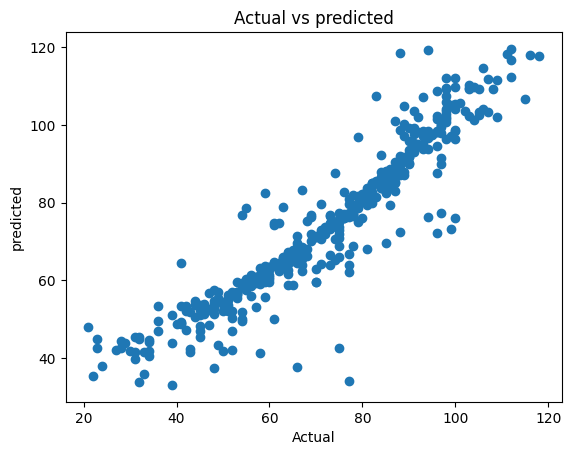

In [79]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, np.squeeze(model4.predict(X_test)) )
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [80]:
y_prd=np.squeeze(np.squeeze(model4.predict(X_test)) )
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

14/14 [==============================] - 0s 3ms/step


,Actual,predict,differences
431,54,59.412987,-5.412987
610,64,67.178490,-3.178490
795,77,76.964050,0.035950
1238,96,98.218704,-2.218704
1228,97,99.401428,-2.401428
794,80,75.976761,4.023239
642,67,68.521950,-1.521950
416,57,59.352085,-2.352085
1410,118,117.648575,0.351425
517,63,63.177555,-0.177555


## keras tuner with RNN

In [81]:
from tensorflow import keras
from keras import layers
from keras.layers import Dense,LSTM,Dropout
from kerastuner.tuners import RandomSearch
def build_model(hp):
    model2= keras.Sequential()
    for i in range(hp.Int('num_layers',2,20)):
        model2.add(layers.LSTM(units=hp.Int('units_' + str(i),
                                           min_value=32,
                                           max_value=512,
                                           step=32),
                                           input_shape=(X_train.shape[1],1),
                              activation='relu'))
        model2.add(layers.Dense(1, activation='linear',name='Dense_1'))
        model2.compile(
              optimizer=keras.optimizers.Adam(
                 hp.Choice('learning rate', [1e-1,1e-2,1e-3,1e-4,1e-5])),
              loss='mean_absolute_error',
              metrics=['mean_absolute_error'])
        return model2

In [82]:
tuner=RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=50, executions_per_trial=3,directory='project2',project_name='A2')

INFO:tensorflow:Reloading Oracle from existing project project2\A2\oracle.json
INFO:tensorflow:Reloading Tuner from project2\A2\tuner0.json


In [83]:
tuner.search(X_train,Y_train ,epochs=100,validation_data=(X_test,Y_test))

INFO:tensorflow:Oracle triggered exit


In [84]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

In [85]:
model5 = tuner.hypermodel.build(best_hps)
model5.fit(X_train, Y_train, epochs=2000,batch_size=32, validation_split=0.3)

Epoch 1/2000
22/22 [==============================] - 18s 218ms/step - loss: 39.2428 - mean_absolute_error: 39.2428 - val_loss: 14.6657 - val_mean_absolute_error: 14.6657
Epoch 2/2000
22/22 [==============================] - 1s 56ms/step - loss: 9.7360 - mean_absolute_error: 9.7360 - val_loss: 6.9789 - val_mean_absolute_error: 6.9789
Epoch 3/2000
22/22 [==============================] - 1s 50ms/step - loss: 5.4170 - mean_absolute_error: 5.4170 - val_loss: 4.7565 - val_mean_absolute_error: 4.7565
Epoch 4/2000
22/22 [==============================] - 1s 50ms/step - loss: 6.1423 - mean_absolute_error: 6.1423 - val_loss: 5.4669 - val_mean_absolute_error: 5.4669
Epoch 5/2000
22/22 [==============================] - 1s 53ms/step - loss: 4.8708 - mean_absolute_error: 4.8708 - val_loss: 4.7582 - val_mean_absolute_error: 4.7582
Epoch 6/2000
22/22 [==============================] - 1s 56ms/step - loss: 4.7096 - mean_absolute_error: 4.7096 - val_loss: 4.5872 - val_mean_absolute_error: 4.5872
Epoc

22/22 [==============================] - 1s 56ms/step - loss: 3.8343 - mean_absolute_error: 3.8343 - val_loss: 4.3587 - val_mean_absolute_error: 4.3587
Epoch 100/2000
22/22 [==============================] - 1s 52ms/step - loss: 4.1947 - mean_absolute_error: 4.1947 - val_loss: 4.7285 - val_mean_absolute_error: 4.7285
Epoch 101/2000
22/22 [==============================] - 2s 71ms/step - loss: 4.0000 - mean_absolute_error: 4.0000 - val_loss: 3.5798 - val_mean_absolute_error: 3.5798
Epoch 102/2000
22/22 [==============================] - 1s 65ms/step - loss: 3.7710 - mean_absolute_error: 3.7710 - val_loss: 3.7688 - val_mean_absolute_error: 3.7688
Epoch 103/2000
22/22 [==============================] - 1s 64ms/step - loss: 4.4142 - mean_absolute_error: 4.4142 - val_loss: 3.5096 - val_mean_absolute_error: 3.5096
Epoch 104/2000
22/22 [==============================] - 1s 61ms/step - loss: 3.8683 - mean_absolute_error: 3.8683 - val_loss: 3.5066 - val_mean_absolute_error: 3.5066
Epoch 105/200

22/22 [==============================] - 2s 71ms/step - loss: 3.7106 - mean_absolute_error: 3.7106 - val_loss: 4.0282 - val_mean_absolute_error: 4.0282
Epoch 198/2000
22/22 [==============================] - 1s 57ms/step - loss: 3.6736 - mean_absolute_error: 3.6736 - val_loss: 3.5595 - val_mean_absolute_error: 3.5595
Epoch 199/2000
22/22 [==============================] - 1s 65ms/step - loss: 3.8708 - mean_absolute_error: 3.8708 - val_loss: 3.5696 - val_mean_absolute_error: 3.5696
Epoch 200/2000
22/22 [==============================] - 2s 78ms/step - loss: 3.7102 - mean_absolute_error: 3.7102 - val_loss: 3.9808 - val_mean_absolute_error: 3.9808
Epoch 201/2000
22/22 [==============================] - 1s 58ms/step - loss: 3.9009 - mean_absolute_error: 3.9009 - val_loss: 3.7808 - val_mean_absolute_error: 3.7808
Epoch 202/2000
22/22 [==============================] - 1s 60ms/step - loss: 3.6919 - mean_absolute_error: 3.6919 - val_loss: 4.0454 - val_mean_absolute_error: 4.0454
Epoch 203/200

22/22 [==============================] - 1s 62ms/step - loss: 4.0814 - mean_absolute_error: 4.0814 - val_loss: 4.0502 - val_mean_absolute_error: 4.0502
Epoch 296/2000
22/22 [==============================] - 2s 77ms/step - loss: 3.8973 - mean_absolute_error: 3.8973 - val_loss: 3.5027 - val_mean_absolute_error: 3.5027
Epoch 297/2000
22/22 [==============================] - 1s 68ms/step - loss: 3.7598 - mean_absolute_error: 3.7598 - val_loss: 4.1187 - val_mean_absolute_error: 4.1187
Epoch 298/2000
22/22 [==============================] - 1s 58ms/step - loss: 4.2773 - mean_absolute_error: 4.2773 - val_loss: 4.4072 - val_mean_absolute_error: 4.4072
Epoch 299/2000
22/22 [==============================] - 2s 73ms/step - loss: 3.6222 - mean_absolute_error: 3.6222 - val_loss: 3.6986 - val_mean_absolute_error: 3.6986
Epoch 300/2000
22/22 [==============================] - 2s 70ms/step - loss: 3.7253 - mean_absolute_error: 3.7253 - val_loss: 4.0538 - val_mean_absolute_error: 4.0538
Epoch 301/200

22/22 [==============================] - 1s 64ms/step - loss: 3.8182 - mean_absolute_error: 3.8182 - val_loss: 3.8565 - val_mean_absolute_error: 3.8565
Epoch 394/2000
22/22 [==============================] - 1s 66ms/step - loss: 3.6497 - mean_absolute_error: 3.6497 - val_loss: 3.7217 - val_mean_absolute_error: 3.7217
Epoch 395/2000
22/22 [==============================] - 1s 61ms/step - loss: 3.5278 - mean_absolute_error: 3.5278 - val_loss: 3.5251 - val_mean_absolute_error: 3.5251
Epoch 396/2000
22/22 [==============================] - 1s 67ms/step - loss: 3.5281 - mean_absolute_error: 3.5281 - val_loss: 3.4931 - val_mean_absolute_error: 3.4931
Epoch 397/2000
22/22 [==============================] - 1s 56ms/step - loss: 3.5469 - mean_absolute_error: 3.5469 - val_loss: 3.6609 - val_mean_absolute_error: 3.6609
Epoch 398/2000
22/22 [==============================] - 1s 61ms/step - loss: 3.5578 - mean_absolute_error: 3.5578 - val_loss: 3.5407 - val_mean_absolute_error: 3.5407
Epoch 399/200

22/22 [==============================] - 2s 76ms/step - loss: 3.5485 - mean_absolute_error: 3.5485 - val_loss: 3.3802 - val_mean_absolute_error: 3.3802
Epoch 492/2000
22/22 [==============================] - 2s 79ms/step - loss: 3.7862 - mean_absolute_error: 3.7862 - val_loss: 4.3354 - val_mean_absolute_error: 4.3354
Epoch 493/2000
22/22 [==============================] - 2s 77ms/step - loss: 3.6362 - mean_absolute_error: 3.6362 - val_loss: 3.4166 - val_mean_absolute_error: 3.4166
Epoch 494/2000
22/22 [==============================] - 2s 77ms/step - loss: 3.7083 - mean_absolute_error: 3.7083 - val_loss: 4.1903 - val_mean_absolute_error: 4.1903
Epoch 495/2000
22/22 [==============================] - 1s 66ms/step - loss: 3.7418 - mean_absolute_error: 3.7418 - val_loss: 3.3770 - val_mean_absolute_error: 3.3770
Epoch 496/2000
22/22 [==============================] - 2s 79ms/step - loss: 3.5821 - mean_absolute_error: 3.5821 - val_loss: 3.4230 - val_mean_absolute_error: 3.4230
Epoch 497/200

22/22 [==============================] - 1s 69ms/step - loss: 3.6539 - mean_absolute_error: 3.6539 - val_loss: 3.4475 - val_mean_absolute_error: 3.4475
Epoch 590/2000
22/22 [==============================] - 1s 67ms/step - loss: 3.4849 - mean_absolute_error: 3.4849 - val_loss: 3.6801 - val_mean_absolute_error: 3.6801
Epoch 591/2000
22/22 [==============================] - 1s 63ms/step - loss: 3.7210 - mean_absolute_error: 3.7210 - val_loss: 3.9835 - val_mean_absolute_error: 3.9835
Epoch 592/2000
22/22 [==============================] - 1s 66ms/step - loss: 3.7506 - mean_absolute_error: 3.7506 - val_loss: 3.4123 - val_mean_absolute_error: 3.4123
Epoch 593/2000
22/22 [==============================] - 1s 63ms/step - loss: 3.4923 - mean_absolute_error: 3.4923 - val_loss: 3.5906 - val_mean_absolute_error: 3.5906
Epoch 594/2000
22/22 [==============================] - 2s 70ms/step - loss: 3.6171 - mean_absolute_error: 3.6171 - val_loss: 3.4130 - val_mean_absolute_error: 3.4130
Epoch 595/200

22/22 [==============================] - 1s 65ms/step - loss: 3.8927 - mean_absolute_error: 3.8927 - val_loss: 3.4741 - val_mean_absolute_error: 3.4741
Epoch 688/2000
22/22 [==============================] - 2s 73ms/step - loss: 3.7600 - mean_absolute_error: 3.7600 - val_loss: 4.0624 - val_mean_absolute_error: 4.0624
Epoch 689/2000
22/22 [==============================] - 1s 69ms/step - loss: 3.8607 - mean_absolute_error: 3.8607 - val_loss: 3.5215 - val_mean_absolute_error: 3.5215
Epoch 690/2000
22/22 [==============================] - 1s 56ms/step - loss: 3.4248 - mean_absolute_error: 3.4248 - val_loss: 3.3680 - val_mean_absolute_error: 3.3680
Epoch 691/2000
22/22 [==============================] - 2s 81ms/step - loss: 3.4819 - mean_absolute_error: 3.4819 - val_loss: 3.7506 - val_mean_absolute_error: 3.7506
Epoch 692/2000
22/22 [==============================] - 1s 63ms/step - loss: 3.4981 - mean_absolute_error: 3.4981 - val_loss: 3.4928 - val_mean_absolute_error: 3.4928
Epoch 693/200

22/22 [==============================] - 2s 77ms/step - loss: 3.5011 - mean_absolute_error: 3.5011 - val_loss: 3.6592 - val_mean_absolute_error: 3.6592
Epoch 786/2000
22/22 [==============================] - 1s 61ms/step - loss: 3.6935 - mean_absolute_error: 3.6935 - val_loss: 3.5840 - val_mean_absolute_error: 3.5840
Epoch 787/2000
22/22 [==============================] - 1s 62ms/step - loss: 3.5208 - mean_absolute_error: 3.5208 - val_loss: 3.5680 - val_mean_absolute_error: 3.5680
Epoch 788/2000
22/22 [==============================] - 1s 55ms/step - loss: 3.5166 - mean_absolute_error: 3.5166 - val_loss: 3.4378 - val_mean_absolute_error: 3.4378
Epoch 789/2000
22/22 [==============================] - 2s 76ms/step - loss: 3.3296 - mean_absolute_error: 3.3296 - val_loss: 3.3852 - val_mean_absolute_error: 3.3852
Epoch 790/2000
22/22 [==============================] - 1s 63ms/step - loss: 3.5805 - mean_absolute_error: 3.5805 - val_loss: 3.5987 - val_mean_absolute_error: 3.5987
Epoch 791/200

22/22 [==============================] - 1s 62ms/step - loss: 3.5207 - mean_absolute_error: 3.5207 - val_loss: 3.4115 - val_mean_absolute_error: 3.4115
Epoch 884/2000
22/22 [==============================] - 1s 69ms/step - loss: 3.3296 - mean_absolute_error: 3.3296 - val_loss: 3.5243 - val_mean_absolute_error: 3.5243
Epoch 885/2000
22/22 [==============================] - 1s 52ms/step - loss: 3.4098 - mean_absolute_error: 3.4098 - val_loss: 3.5091 - val_mean_absolute_error: 3.5091
Epoch 886/2000
22/22 [==============================] - 1s 69ms/step - loss: 3.4506 - mean_absolute_error: 3.4506 - val_loss: 3.9538 - val_mean_absolute_error: 3.9538
Epoch 887/2000
22/22 [==============================] - 1s 56ms/step - loss: 3.5772 - mean_absolute_error: 3.5772 - val_loss: 3.4632 - val_mean_absolute_error: 3.4632
Epoch 888/2000
22/22 [==============================] - 2s 66ms/step - loss: 3.4383 - mean_absolute_error: 3.4383 - val_loss: 3.4358 - val_mean_absolute_error: 3.4358
Epoch 889/200

22/22 [==============================] - 2s 80ms/step - loss: 3.3425 - mean_absolute_error: 3.3425 - val_loss: 3.9053 - val_mean_absolute_error: 3.9053
Epoch 982/2000
22/22 [==============================] - 2s 73ms/step - loss: 3.8108 - mean_absolute_error: 3.8108 - val_loss: 4.0322 - val_mean_absolute_error: 4.0322
Epoch 983/2000
22/22 [==============================] - 1s 58ms/step - loss: 3.7171 - mean_absolute_error: 3.7171 - val_loss: 3.4620 - val_mean_absolute_error: 3.4620
Epoch 984/2000
22/22 [==============================] - 1s 53ms/step - loss: 3.4674 - mean_absolute_error: 3.4674 - val_loss: 3.8450 - val_mean_absolute_error: 3.8450
Epoch 985/2000
22/22 [==============================] - 1s 63ms/step - loss: 3.5349 - mean_absolute_error: 3.5349 - val_loss: 3.4238 - val_mean_absolute_error: 3.4238
Epoch 986/2000
22/22 [==============================] - 1s 61ms/step - loss: 3.5586 - mean_absolute_error: 3.5586 - val_loss: 3.4873 - val_mean_absolute_error: 3.4873
Epoch 987/200

Epoch 1030/2000
22/22 [==============================] - 1s 55ms/step - loss: 3.5182 - mean_absolute_error: 3.5182 - val_loss: 3.6662 - val_mean_absolute_error: 3.6662
Epoch 1031/2000
22/22 [==============================] - 1s 58ms/step - loss: 3.4294 - mean_absolute_error: 3.4294 - val_loss: 3.4315 - val_mean_absolute_error: 3.4315
Epoch 1032/2000
22/22 [==============================] - 1s 62ms/step - loss: 3.3046 - mean_absolute_error: 3.3046 - val_loss: 3.4822 - val_mean_absolute_error: 3.4822
Epoch 1033/2000
22/22 [==============================] - 1s 53ms/step - loss: 3.3545 - mean_absolute_error: 3.3545 - val_loss: 3.7599 - val_mean_absolute_error: 3.7599
Epoch 1034/2000
22/22 [==============================] - 1s 54ms/step - loss: 3.5243 - mean_absolute_error: 3.5243 - val_loss: 3.4887 - val_mean_absolute_error: 3.4887
Epoch 1035/2000
22/22 [==============================] - 1s 58ms/step - loss: 3.4800 - mean_absolute_error: 3.4800 - val_loss: 3.6902 - val_mean_absolute_error:

Epoch 1079/2000
22/22 [==============================] - 1s 50ms/step - loss: 3.2974 - mean_absolute_error: 3.2974 - val_loss: 3.5472 - val_mean_absolute_error: 3.5472
Epoch 1080/2000
22/22 [==============================] - 1s 49ms/step - loss: 3.3174 - mean_absolute_error: 3.3174 - val_loss: 3.4913 - val_mean_absolute_error: 3.4913
Epoch 1081/2000
22/22 [==============================] - 1s 53ms/step - loss: 3.1975 - mean_absolute_error: 3.1975 - val_loss: 3.6684 - val_mean_absolute_error: 3.6684
Epoch 1082/2000
22/22 [==============================] - 1s 51ms/step - loss: 3.2835 - mean_absolute_error: 3.2835 - val_loss: 3.4504 - val_mean_absolute_error: 3.4504
Epoch 1083/2000
22/22 [==============================] - 1s 51ms/step - loss: 3.3080 - mean_absolute_error: 3.3080 - val_loss: 3.4527 - val_mean_absolute_error: 3.4527
Epoch 1084/2000
22/22 [==============================] - 1s 48ms/step - loss: 3.4471 - mean_absolute_error: 3.4471 - val_loss: 3.5062 - val_mean_absolute_error:

Epoch 1128/2000
22/22 [==============================] - 1s 42ms/step - loss: 3.4034 - mean_absolute_error: 3.4034 - val_loss: 3.5572 - val_mean_absolute_error: 3.5572
Epoch 1129/2000
22/22 [==============================] - 1s 48ms/step - loss: 3.2982 - mean_absolute_error: 3.2982 - val_loss: 3.5187 - val_mean_absolute_error: 3.5187
Epoch 1130/2000
22/22 [==============================] - 1s 44ms/step - loss: 3.3062 - mean_absolute_error: 3.3062 - val_loss: 3.4320 - val_mean_absolute_error: 3.4320
Epoch 1131/2000
22/22 [==============================] - 1s 42ms/step - loss: 3.3693 - mean_absolute_error: 3.3693 - val_loss: 3.5043 - val_mean_absolute_error: 3.5043
Epoch 1132/2000
22/22 [==============================] - 1s 51ms/step - loss: 3.3979 - mean_absolute_error: 3.3979 - val_loss: 3.5393 - val_mean_absolute_error: 3.5393
Epoch 1133/2000
22/22 [==============================] - 1s 44ms/step - loss: 3.2996 - mean_absolute_error: 3.2996 - val_loss: 3.3459 - val_mean_absolute_error:

Epoch 1177/2000
22/22 [==============================] - 1s 40ms/step - loss: 3.3586 - mean_absolute_error: 3.3586 - val_loss: 3.4959 - val_mean_absolute_error: 3.4959
Epoch 1178/2000
22/22 [==============================] - 1s 49ms/step - loss: 3.2169 - mean_absolute_error: 3.2169 - val_loss: 3.5846 - val_mean_absolute_error: 3.5846
Epoch 1179/2000
22/22 [==============================] - 1s 45ms/step - loss: 3.5050 - mean_absolute_error: 3.5050 - val_loss: 3.8834 - val_mean_absolute_error: 3.8834
Epoch 1180/2000
22/22 [==============================] - 1s 47ms/step - loss: 3.4364 - mean_absolute_error: 3.4364 - val_loss: 3.5553 - val_mean_absolute_error: 3.5553
Epoch 1181/2000
22/22 [==============================] - 1s 46ms/step - loss: 3.4709 - mean_absolute_error: 3.4709 - val_loss: 3.5131 - val_mean_absolute_error: 3.5131
Epoch 1182/2000
22/22 [==============================] - 1s 50ms/step - loss: 3.2776 - mean_absolute_error: 3.2776 - val_loss: 3.5090 - val_mean_absolute_error:

Epoch 1226/2000
22/22 [==============================] - 1s 47ms/step - loss: 3.4170 - mean_absolute_error: 3.4170 - val_loss: 3.4126 - val_mean_absolute_error: 3.4126
Epoch 1227/2000
22/22 [==============================] - 1s 49ms/step - loss: 3.2420 - mean_absolute_error: 3.2420 - val_loss: 3.4756 - val_mean_absolute_error: 3.4756
Epoch 1228/2000
22/22 [==============================] - 1s 43ms/step - loss: 3.3383 - mean_absolute_error: 3.3383 - val_loss: 3.5915 - val_mean_absolute_error: 3.5915
Epoch 1229/2000
22/22 [==============================] - 1s 45ms/step - loss: 3.2812 - mean_absolute_error: 3.2812 - val_loss: 3.5417 - val_mean_absolute_error: 3.5417
Epoch 1230/2000
22/22 [==============================] - 1s 40ms/step - loss: 3.4437 - mean_absolute_error: 3.4437 - val_loss: 4.0314 - val_mean_absolute_error: 4.0314
Epoch 1231/2000
22/22 [==============================] - 1s 47ms/step - loss: 3.3087 - mean_absolute_error: 3.3087 - val_loss: 3.5173 - val_mean_absolute_error:

Epoch 1275/2000
22/22 [==============================] - 1s 59ms/step - loss: 3.3039 - mean_absolute_error: 3.3039 - val_loss: 3.4605 - val_mean_absolute_error: 3.4605
Epoch 1276/2000
22/22 [==============================] - 1s 47ms/step - loss: 3.2744 - mean_absolute_error: 3.2744 - val_loss: 3.4987 - val_mean_absolute_error: 3.4987
Epoch 1277/2000
22/22 [==============================] - 1s 56ms/step - loss: 3.3606 - mean_absolute_error: 3.3606 - val_loss: 4.1014 - val_mean_absolute_error: 4.1014
Epoch 1278/2000
22/22 [==============================] - 1s 48ms/step - loss: 3.4055 - mean_absolute_error: 3.4055 - val_loss: 3.5349 - val_mean_absolute_error: 3.5349
Epoch 1279/2000
22/22 [==============================] - 1s 50ms/step - loss: 3.3248 - mean_absolute_error: 3.3248 - val_loss: 3.4317 - val_mean_absolute_error: 3.4317
Epoch 1280/2000
22/22 [==============================] - 1s 45ms/step - loss: 3.2397 - mean_absolute_error: 3.2397 - val_loss: 3.5599 - val_mean_absolute_error:

Epoch 1324/2000
22/22 [==============================] - 1s 41ms/step - loss: 3.2546 - mean_absolute_error: 3.2546 - val_loss: 3.6340 - val_mean_absolute_error: 3.6340
Epoch 1325/2000
22/22 [==============================] - 1s 45ms/step - loss: 3.4983 - mean_absolute_error: 3.4983 - val_loss: 3.7983 - val_mean_absolute_error: 3.7983
Epoch 1326/2000
22/22 [==============================] - 1s 48ms/step - loss: 3.3475 - mean_absolute_error: 3.3475 - val_loss: 3.4609 - val_mean_absolute_error: 3.4609
Epoch 1327/2000
22/22 [==============================] - 1s 46ms/step - loss: 3.4356 - mean_absolute_error: 3.4356 - val_loss: 3.7428 - val_mean_absolute_error: 3.7428
Epoch 1328/2000
22/22 [==============================] - 1s 46ms/step - loss: 3.2450 - mean_absolute_error: 3.2450 - val_loss: 3.4367 - val_mean_absolute_error: 3.4367
Epoch 1329/2000
22/22 [==============================] - 1s 52ms/step - loss: 3.3858 - mean_absolute_error: 3.3858 - val_loss: 3.6328 - val_mean_absolute_error:

Epoch 1373/2000
22/22 [==============================] - 1s 47ms/step - loss: 3.2072 - mean_absolute_error: 3.2072 - val_loss: 3.5487 - val_mean_absolute_error: 3.5487
Epoch 1374/2000
22/22 [==============================] - 1s 44ms/step - loss: 3.2622 - mean_absolute_error: 3.2622 - val_loss: 3.4794 - val_mean_absolute_error: 3.4794
Epoch 1375/2000
22/22 [==============================] - 1s 45ms/step - loss: 3.3226 - mean_absolute_error: 3.3226 - val_loss: 3.9627 - val_mean_absolute_error: 3.9627
Epoch 1376/2000
22/22 [==============================] - 1s 36ms/step - loss: 3.3335 - mean_absolute_error: 3.3335 - val_loss: 3.6060 - val_mean_absolute_error: 3.6060
Epoch 1377/2000
22/22 [==============================] - 1s 38ms/step - loss: 3.1956 - mean_absolute_error: 3.1956 - val_loss: 3.5782 - val_mean_absolute_error: 3.5782
Epoch 1378/2000
22/22 [==============================] - 1s 37ms/step - loss: 3.2469 - mean_absolute_error: 3.2469 - val_loss: 3.6433 - val_mean_absolute_error:

Epoch 1422/2000
22/22 [==============================] - 1s 29ms/step - loss: 3.1655 - mean_absolute_error: 3.1655 - val_loss: 3.4558 - val_mean_absolute_error: 3.4558
Epoch 1423/2000
22/22 [==============================] - 1s 31ms/step - loss: 3.2676 - mean_absolute_error: 3.2676 - val_loss: 3.6383 - val_mean_absolute_error: 3.6383
Epoch 1424/2000
22/22 [==============================] - 1s 31ms/step - loss: 3.2937 - mean_absolute_error: 3.2937 - val_loss: 3.5053 - val_mean_absolute_error: 3.5053
Epoch 1425/2000
22/22 [==============================] - 1s 33ms/step - loss: 3.1841 - mean_absolute_error: 3.1841 - val_loss: 3.4876 - val_mean_absolute_error: 3.4876
Epoch 1426/2000
22/22 [==============================] - 1s 31ms/step - loss: 3.2420 - mean_absolute_error: 3.2420 - val_loss: 3.5886 - val_mean_absolute_error: 3.5886
Epoch 1427/2000
22/22 [==============================] - 1s 29ms/step - loss: 3.3108 - mean_absolute_error: 3.3108 - val_loss: 3.8754 - val_mean_absolute_error:

Epoch 1471/2000
22/22 [==============================] - 1s 31ms/step - loss: 3.1590 - mean_absolute_error: 3.1590 - val_loss: 3.6284 - val_mean_absolute_error: 3.6284
Epoch 1472/2000
22/22 [==============================] - 1s 30ms/step - loss: 3.1442 - mean_absolute_error: 3.1442 - val_loss: 3.6445 - val_mean_absolute_error: 3.6445
Epoch 1473/2000
22/22 [==============================] - 1s 29ms/step - loss: 3.1979 - mean_absolute_error: 3.1979 - val_loss: 3.4091 - val_mean_absolute_error: 3.4091
Epoch 1474/2000
22/22 [==============================] - 1s 30ms/step - loss: 3.3987 - mean_absolute_error: 3.3987 - val_loss: 3.3613 - val_mean_absolute_error: 3.3613
Epoch 1475/2000
22/22 [==============================] - 1s 29ms/step - loss: 3.2230 - mean_absolute_error: 3.2230 - val_loss: 3.6108 - val_mean_absolute_error: 3.6108
Epoch 1476/2000
22/22 [==============================] - 1s 29ms/step - loss: 3.2942 - mean_absolute_error: 3.2942 - val_loss: 3.5139 - val_mean_absolute_error:

Epoch 1520/2000
22/22 [==============================] - 1s 31ms/step - loss: 3.2308 - mean_absolute_error: 3.2308 - val_loss: 3.4506 - val_mean_absolute_error: 3.4506
Epoch 1521/2000
22/22 [==============================] - 1s 28ms/step - loss: 3.1513 - mean_absolute_error: 3.1513 - val_loss: 3.5342 - val_mean_absolute_error: 3.5342
Epoch 1522/2000
22/22 [==============================] - 1s 29ms/step - loss: 3.4301 - mean_absolute_error: 3.4301 - val_loss: 3.5438 - val_mean_absolute_error: 3.5438
Epoch 1523/2000
22/22 [==============================] - 1s 28ms/step - loss: 3.2395 - mean_absolute_error: 3.2395 - val_loss: 3.6257 - val_mean_absolute_error: 3.6257
Epoch 1524/2000
22/22 [==============================] - 1s 28ms/step - loss: 3.1830 - mean_absolute_error: 3.1830 - val_loss: 3.6958 - val_mean_absolute_error: 3.6958
Epoch 1525/2000
22/22 [==============================] - 1s 28ms/step - loss: 3.3130 - mean_absolute_error: 3.3130 - val_loss: 3.5612 - val_mean_absolute_error:

Epoch 1569/2000
22/22 [==============================] - 1s 30ms/step - loss: 3.2635 - mean_absolute_error: 3.2635 - val_loss: 3.4806 - val_mean_absolute_error: 3.4806
Epoch 1570/2000
22/22 [==============================] - 1s 30ms/step - loss: 3.0915 - mean_absolute_error: 3.0915 - val_loss: 3.5459 - val_mean_absolute_error: 3.5459
Epoch 1571/2000
22/22 [==============================] - 1s 30ms/step - loss: 3.1739 - mean_absolute_error: 3.1739 - val_loss: 3.4777 - val_mean_absolute_error: 3.4777
Epoch 1572/2000
22/22 [==============================] - 1s 31ms/step - loss: 3.2593 - mean_absolute_error: 3.2593 - val_loss: 3.5746 - val_mean_absolute_error: 3.5746
Epoch 1573/2000
22/22 [==============================] - 1s 30ms/step - loss: 3.1395 - mean_absolute_error: 3.1395 - val_loss: 3.5291 - val_mean_absolute_error: 3.5291
Epoch 1574/2000
22/22 [==============================] - 1s 32ms/step - loss: 3.1901 - mean_absolute_error: 3.1901 - val_loss: 3.3898 - val_mean_absolute_error:

Epoch 1618/2000
22/22 [==============================] - 1s 33ms/step - loss: 3.4101 - mean_absolute_error: 3.4101 - val_loss: 4.0088 - val_mean_absolute_error: 4.0088
Epoch 1619/2000
22/22 [==============================] - 1s 29ms/step - loss: 3.3230 - mean_absolute_error: 3.3230 - val_loss: 3.5710 - val_mean_absolute_error: 3.5710
Epoch 1620/2000
22/22 [==============================] - 1s 33ms/step - loss: 3.4054 - mean_absolute_error: 3.4054 - val_loss: 3.5878 - val_mean_absolute_error: 3.5878
Epoch 1621/2000
22/22 [==============================] - 1s 30ms/step - loss: 3.4762 - mean_absolute_error: 3.4762 - val_loss: 3.7003 - val_mean_absolute_error: 3.7003
Epoch 1622/2000
22/22 [==============================] - 1s 30ms/step - loss: 3.4939 - mean_absolute_error: 3.4939 - val_loss: 3.5101 - val_mean_absolute_error: 3.5101
Epoch 1623/2000
22/22 [==============================] - 1s 31ms/step - loss: 3.3234 - mean_absolute_error: 3.3234 - val_loss: 3.4629 - val_mean_absolute_error:

Epoch 1667/2000
22/22 [==============================] - 1s 29ms/step - loss: 3.1015 - mean_absolute_error: 3.1015 - val_loss: 3.5099 - val_mean_absolute_error: 3.5099
Epoch 1668/2000
22/22 [==============================] - 1s 33ms/step - loss: 3.2569 - mean_absolute_error: 3.2569 - val_loss: 3.5209 - val_mean_absolute_error: 3.5209
Epoch 1669/2000
22/22 [==============================] - 1s 29ms/step - loss: 3.1844 - mean_absolute_error: 3.1844 - val_loss: 3.4937 - val_mean_absolute_error: 3.4937
Epoch 1670/2000
22/22 [==============================] - 1s 32ms/step - loss: 3.3334 - mean_absolute_error: 3.3334 - val_loss: 4.2982 - val_mean_absolute_error: 4.2982
Epoch 1671/2000
22/22 [==============================] - 1s 34ms/step - loss: 3.4852 - mean_absolute_error: 3.4852 - val_loss: 4.2803 - val_mean_absolute_error: 4.2803
Epoch 1672/2000
22/22 [==============================] - 1s 31ms/step - loss: 3.5516 - mean_absolute_error: 3.5516 - val_loss: 3.3791 - val_mean_absolute_error:

Epoch 1716/2000
22/22 [==============================] - 1s 31ms/step - loss: 3.3206 - mean_absolute_error: 3.3206 - val_loss: 4.0322 - val_mean_absolute_error: 4.0322
Epoch 1717/2000
22/22 [==============================] - 1s 32ms/step - loss: 3.4099 - mean_absolute_error: 3.4099 - val_loss: 3.6265 - val_mean_absolute_error: 3.6265
Epoch 1718/2000
22/22 [==============================] - 1s 29ms/step - loss: 3.5447 - mean_absolute_error: 3.5447 - val_loss: 3.4853 - val_mean_absolute_error: 3.4853
Epoch 1719/2000
22/22 [==============================] - 1s 30ms/step - loss: 3.2236 - mean_absolute_error: 3.2236 - val_loss: 3.6915 - val_mean_absolute_error: 3.6915
Epoch 1720/2000
22/22 [==============================] - 1s 31ms/step - loss: 3.1811 - mean_absolute_error: 3.1811 - val_loss: 3.5140 - val_mean_absolute_error: 3.5140
Epoch 1721/2000
22/22 [==============================] - 1s 32ms/step - loss: 3.1742 - mean_absolute_error: 3.1742 - val_loss: 3.4737 - val_mean_absolute_error:

Epoch 1765/2000
22/22 [==============================] - 1s 33ms/step - loss: 3.1725 - mean_absolute_error: 3.1725 - val_loss: 3.5112 - val_mean_absolute_error: 3.5112
Epoch 1766/2000
22/22 [==============================] - 1s 31ms/step - loss: 3.1492 - mean_absolute_error: 3.1492 - val_loss: 3.5001 - val_mean_absolute_error: 3.5001
Epoch 1767/2000
22/22 [==============================] - 1s 30ms/step - loss: 3.1546 - mean_absolute_error: 3.1546 - val_loss: 3.6382 - val_mean_absolute_error: 3.6382
Epoch 1768/2000
22/22 [==============================] - 1s 37ms/step - loss: 3.2354 - mean_absolute_error: 3.2354 - val_loss: 3.5252 - val_mean_absolute_error: 3.5252
Epoch 1769/2000
22/22 [==============================] - 1s 34ms/step - loss: 3.2283 - mean_absolute_error: 3.2283 - val_loss: 3.5745 - val_mean_absolute_error: 3.5745
Epoch 1770/2000
22/22 [==============================] - 1s 34ms/step - loss: 3.1805 - mean_absolute_error: 3.1805 - val_loss: 3.4685 - val_mean_absolute_error:

Epoch 1814/2000
22/22 [==============================] - 1s 28ms/step - loss: 3.3116 - mean_absolute_error: 3.3116 - val_loss: 3.9572 - val_mean_absolute_error: 3.9572
Epoch 1815/2000
22/22 [==============================] - 1s 30ms/step - loss: 3.4218 - mean_absolute_error: 3.4218 - val_loss: 3.6934 - val_mean_absolute_error: 3.6934
Epoch 1816/2000
22/22 [==============================] - 1s 30ms/step - loss: 3.2391 - mean_absolute_error: 3.2391 - val_loss: 3.4880 - val_mean_absolute_error: 3.4880
Epoch 1817/2000
22/22 [==============================] - 1s 29ms/step - loss: 3.1917 - mean_absolute_error: 3.1917 - val_loss: 3.5863 - val_mean_absolute_error: 3.5863
Epoch 1818/2000
22/22 [==============================] - 1s 31ms/step - loss: 3.3371 - mean_absolute_error: 3.3371 - val_loss: 3.5971 - val_mean_absolute_error: 3.5971
Epoch 1819/2000
22/22 [==============================] - 1s 28ms/step - loss: 3.3103 - mean_absolute_error: 3.3103 - val_loss: 3.7045 - val_mean_absolute_error:

Epoch 1863/2000
22/22 [==============================] - 1s 27ms/step - loss: 3.2029 - mean_absolute_error: 3.2029 - val_loss: 3.5018 - val_mean_absolute_error: 3.5018
Epoch 1864/2000
22/22 [==============================] - 1s 27ms/step - loss: 3.1616 - mean_absolute_error: 3.1616 - val_loss: 3.5232 - val_mean_absolute_error: 3.5232
Epoch 1865/2000
22/22 [==============================] - 1s 27ms/step - loss: 3.2828 - mean_absolute_error: 3.2828 - val_loss: 3.7549 - val_mean_absolute_error: 3.7549
Epoch 1866/2000
22/22 [==============================] - 1s 29ms/step - loss: 3.3186 - mean_absolute_error: 3.3186 - val_loss: 3.5101 - val_mean_absolute_error: 3.5101
Epoch 1867/2000
22/22 [==============================] - 1s 27ms/step - loss: 3.2173 - mean_absolute_error: 3.2173 - val_loss: 3.6456 - val_mean_absolute_error: 3.6456
Epoch 1868/2000
22/22 [==============================] - 1s 30ms/step - loss: 3.1272 - mean_absolute_error: 3.1272 - val_loss: 3.6379 - val_mean_absolute_error:

Epoch 1912/2000
22/22 [==============================] - 1s 31ms/step - loss: 3.5126 - mean_absolute_error: 3.5126 - val_loss: 3.4966 - val_mean_absolute_error: 3.4966
Epoch 1913/2000
22/22 [==============================] - 1s 33ms/step - loss: 3.2655 - mean_absolute_error: 3.2655 - val_loss: 3.6533 - val_mean_absolute_error: 3.6533
Epoch 1914/2000
22/22 [==============================] - 1s 33ms/step - loss: 3.2771 - mean_absolute_error: 3.2771 - val_loss: 3.5295 - val_mean_absolute_error: 3.5295
Epoch 1915/2000
22/22 [==============================] - 1s 32ms/step - loss: 3.2051 - mean_absolute_error: 3.2051 - val_loss: 3.6989 - val_mean_absolute_error: 3.6989
Epoch 1916/2000
22/22 [==============================] - 1s 37ms/step - loss: 3.2544 - mean_absolute_error: 3.2544 - val_loss: 3.5901 - val_mean_absolute_error: 3.5901
Epoch 1917/2000
22/22 [==============================] - 1s 35ms/step - loss: 3.4899 - mean_absolute_error: 3.4899 - val_loss: 3.6621 - val_mean_absolute_error:

Epoch 1961/2000
22/22 [==============================] - 1s 33ms/step - loss: 3.1093 - mean_absolute_error: 3.1093 - val_loss: 3.6297 - val_mean_absolute_error: 3.6297
Epoch 1962/2000
22/22 [==============================] - 1s 35ms/step - loss: 3.4157 - mean_absolute_error: 3.4157 - val_loss: 3.5005 - val_mean_absolute_error: 3.5005
Epoch 1963/2000
22/22 [==============================] - 1s 31ms/step - loss: 3.1487 - mean_absolute_error: 3.1487 - val_loss: 3.5225 - val_mean_absolute_error: 3.5225
Epoch 1964/2000
22/22 [==============================] - 1s 32ms/step - loss: 3.2216 - mean_absolute_error: 3.2216 - val_loss: 3.5228 - val_mean_absolute_error: 3.5228
Epoch 1965/2000
22/22 [==============================] - 1s 34ms/step - loss: 3.1486 - mean_absolute_error: 3.1486 - val_loss: 3.4980 - val_mean_absolute_error: 3.4980
Epoch 1966/2000
22/22 [==============================] - 1s 35ms/step - loss: 3.4120 - mean_absolute_error: 3.4120 - val_loss: 3.5041 - val_mean_absolute_error:

In [86]:
import numpy as np
from sklearn.metrics import r2_score
r2_score(Y_test, np.squeeze(model5.predict(X_test)) )

14/14 [==============================] - 1s 13ms/step


0.8719983176895569

In [87]:
prediction =np.squeeze(model5.predict([[80,2,2,129]]))
print("Prediction: {}".format(prediction))

1/1 [==============================] - 1s 740ms/step
Prediction: 64.57767486572266


In [88]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, np.squeeze(model5.predict(X_test)) )
mae= mean_absolute_error(Y_test, np.squeeze(model5.predict(X_test)) )
print('mean squired error:', mse)
print('mean absolute error:', mae)

14/14 [==============================] - 0s 11ms/step
mean squired error: 55.24836675819816
mean absolute error: 4.187568360091375


14/14 [==============================] - 0s 10ms/step


Text(0.5, 1.0, 'Actual vs predicted')

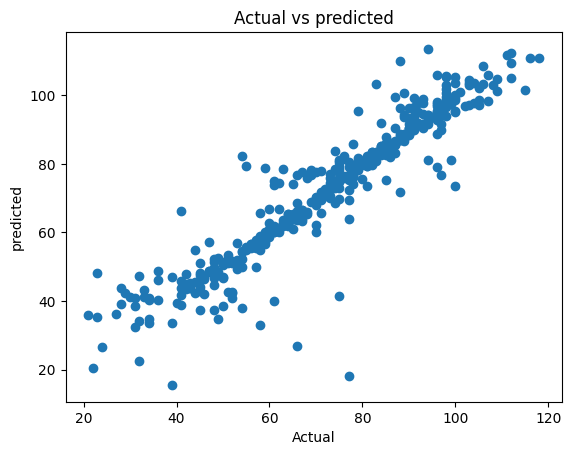

In [89]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, np.squeeze(model5.predict(X_test)) )
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [90]:
y_prd=np.squeeze(np.squeeze(model5.predict(X_test)) )
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

14/14 [==============================] - 0s 10ms/step


,Actual,predict,differences
431,54,54.435429,-0.435429
610,64,64.627808,-0.627808
795,77,76.288910,0.711090
1238,96,95.306770,0.693230
1228,97,95.296722,1.703278
794,80,75.558693,4.441307
642,67,66.438087,0.561913
416,57,57.668251,-0.668251
1410,118,110.933449,7.066551
517,63,62.509171,0.490829
